<a href="https://colab.research.google.com/github/KeertanPatro/EDA_Classification/blob/main/Cardiovascular_risk_prediction_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascualr risk prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [97]:
# Import Libraries

# data wrangling
import pandas as pd
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# librariers for hypothesis tests

from scipy.stats import chi2_contingency

# libraries for data preprocessing and ML model implementation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, roc_curve,classification_report

In [98]:
plt.style.use('ggplot')

In [99]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [100]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification_Capstone_project /data_cardiovascular_risk.csv')

### Dataset First View

In [102]:
# Dataset First Look
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [103]:
# Dataset Last look
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [104]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [105]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [106]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


There are no duplicate values found in this dataset.

#### Missing Values/Null Values

In [107]:
# Missing Values/Null Values Count
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

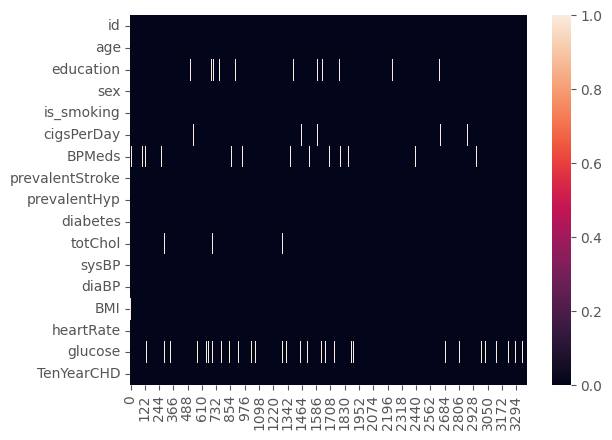

In [108]:
# Visualizing the missing values
sns.heatmap(df.isna().transpose())

### What did you know about your dataset?

* The Dataset has 3390 rowa and 17 columns.
* There are no duplicates in this dataset.
* There are null values in certain columns.

## ***2. Understanding Your Variables***

In [109]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [110]:
# Dataset Describe

df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [111]:
# categorical variables
df.describe(include=['object','category'])

,sex,is_smoking
count,3390,3390
unique,2,2
top,F,NO
freq,1923,1703


In [112]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Variables Description

There are 15 variables each of the variables is a potential risk factor in causing a coronary heart disease. These 15 variables can be categorised into 3 classification, they are Demographic, behavorial and medical.

**Demographic**
* Sex:  Sex of the person("M" or "F").
* Age: Age of the person(Continious)

**Behavorial**
* is_smoking: Is the person smoking or not ("YES" or "NO")
* Cigs_per_Day: How cigerattes does the person smoke per day.


**Medical**
* BP meds : whether or not the patient was on blood pressure medication (Nominal)
* Prevalent_stroke:  whether or not the patient had previously had a stroke (Nominal)
* Prevalent_hyp:  whether or not the patient was hypertensive (Nominal)
* Diabetes:
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous)
* Glucose: glucose level (Continuous)

**Target variable (desired target)**
* TenYearCHD: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

### Check Unique Values for each variable.

In [113]:
# Check Unique Values for each variable.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [114]:
# Write your code to make your dataset analysis ready.
df.drop('id',axis=1,inplace=True)

In [115]:
# distinguishing numerical and categorical variables

cat_variables=[i for i in df.columns if df[i].nunique()<=4]
print(cat_variables)
num_variables=[i for i in df.columns if df[i].nunique()>4]
print(num_variables)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


### What all manipulations have you done and insights you found?

1. I first dropped 'id' column from the dataset.
2. I distinguished numerical column and categorical column based on the fact that if number of unique values are less than 4 it is categorical if more than 4 it is numerical.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

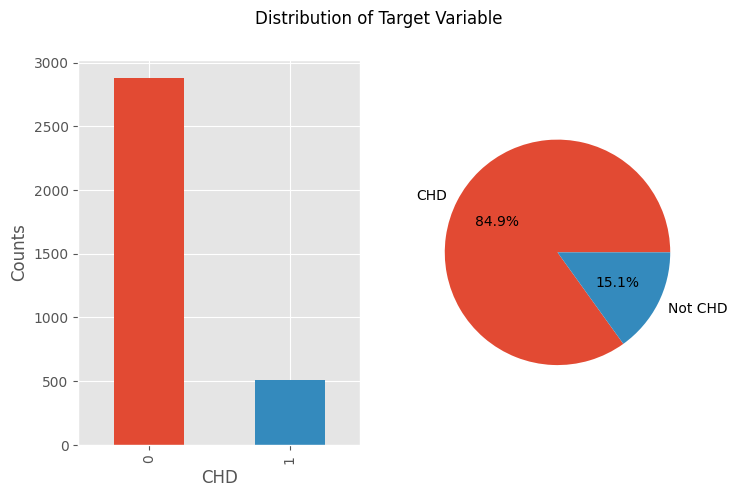

In [116]:
# Chart - 1 visualization code

# Distribution of Target variable
color=sns.color_palette()
fig=plt.figure(figsize=(8,5))
fig.suptitle("Distribution of Target Variable")
plt.subplot(1,2,1)
df['TenYearCHD'].value_counts().plot.bar(color=color)
plt.xlabel("CHD")
plt.ylabel("Counts")
plt.subplot(1,2,2)
plt.pie(df['TenYearCHD'].value_counts(),labels=['CHD','Not CHD'],autopct='%.1f%%',colors=color)

plt.show()

##### 1. Why did you pick the specific chart?

It is important to know how your target variables are distributed, based on that you can do certain transformation while fitting ML models.

##### 2. What is/are the insight(s) found from the chart?

We see that about 85 % of the people in this dataset don't have a risk of getting cornonary heart disease, while 15% have the risk of getting a cornonary heart disease, this makes the dataset imbalance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight will help us create appropriate ML models which will help us in better prediction

#### Chart - 2

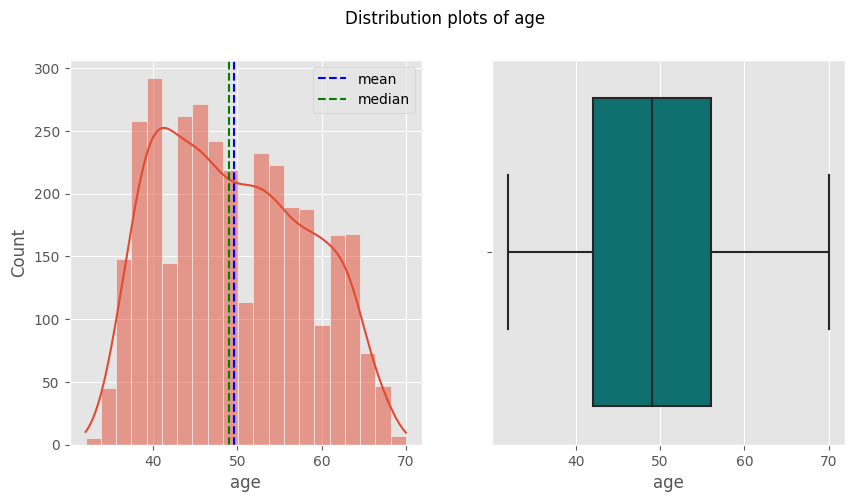

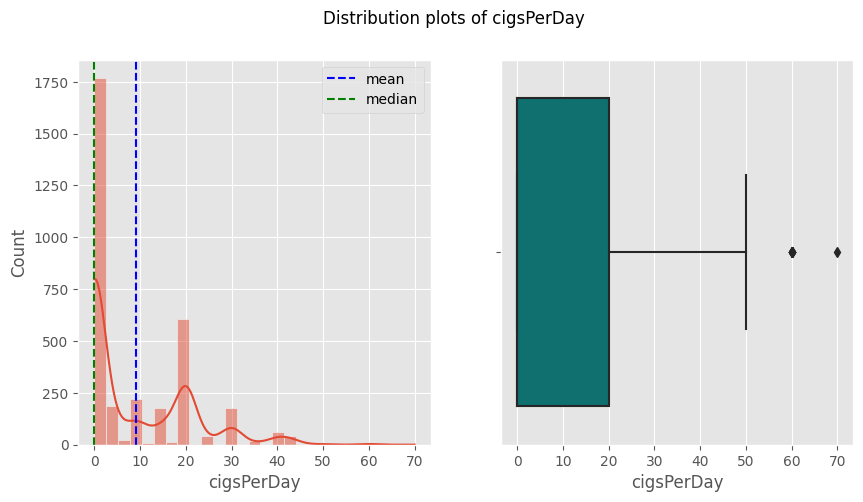

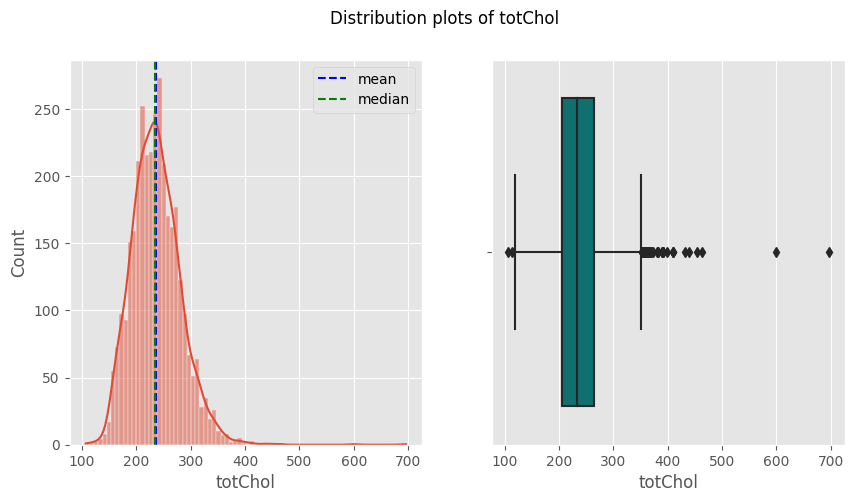

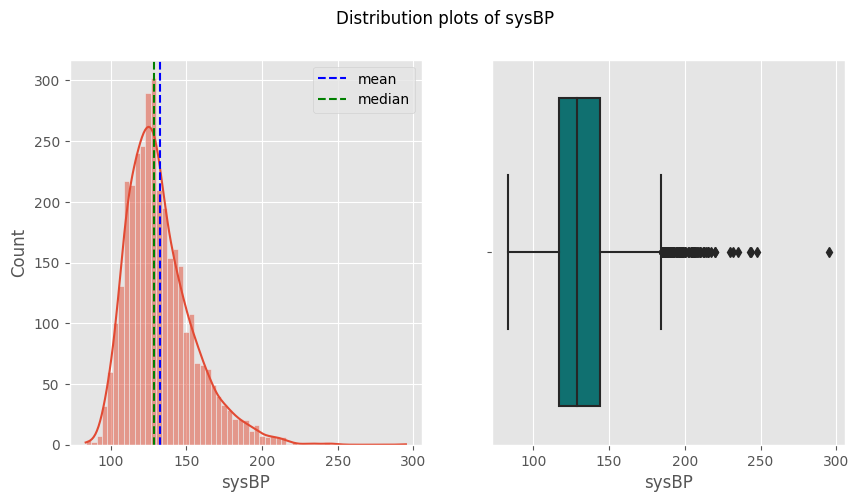

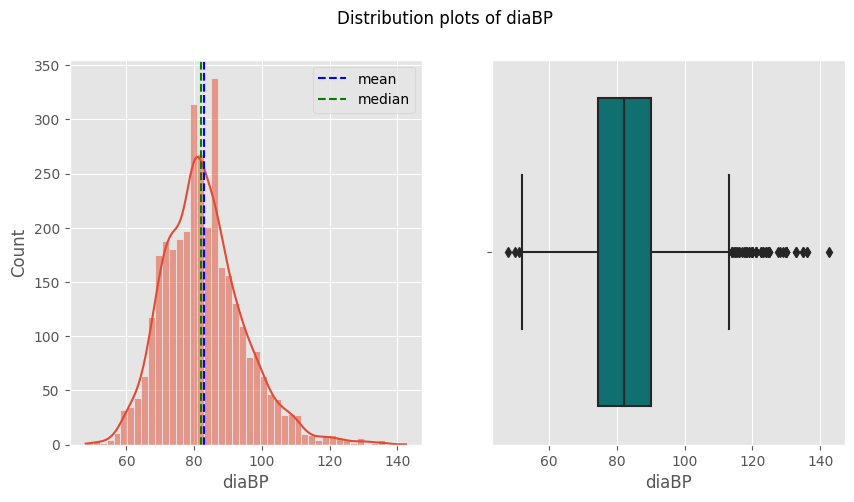

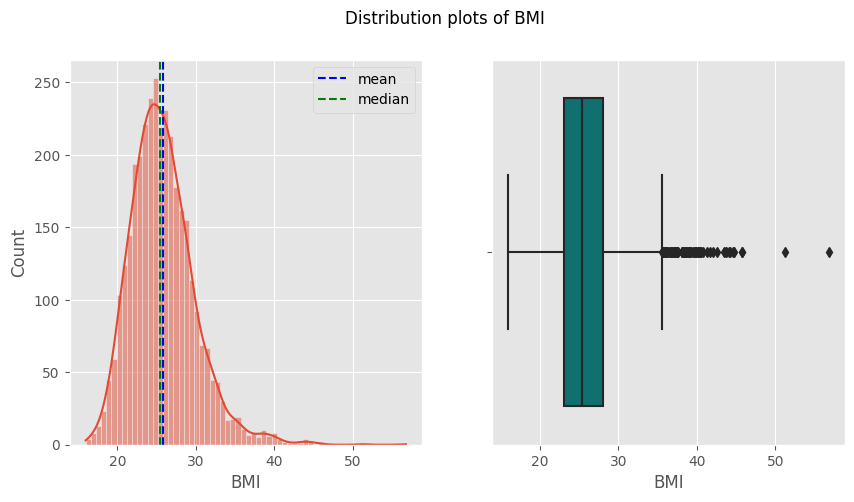

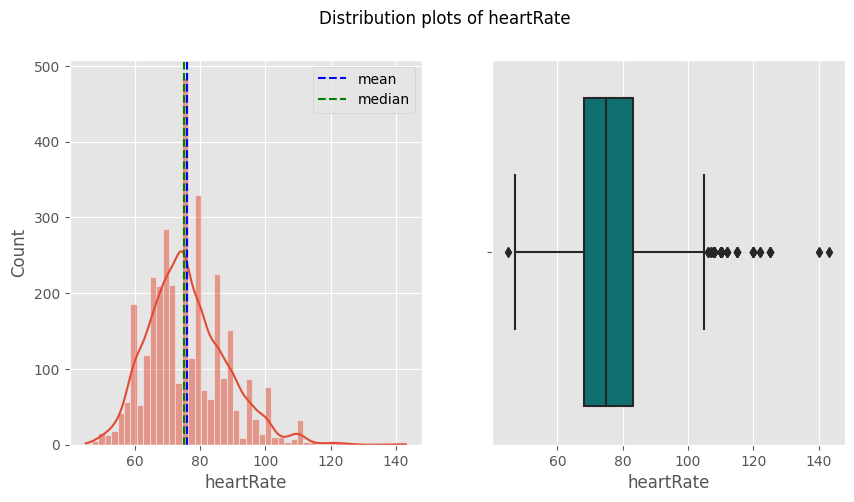

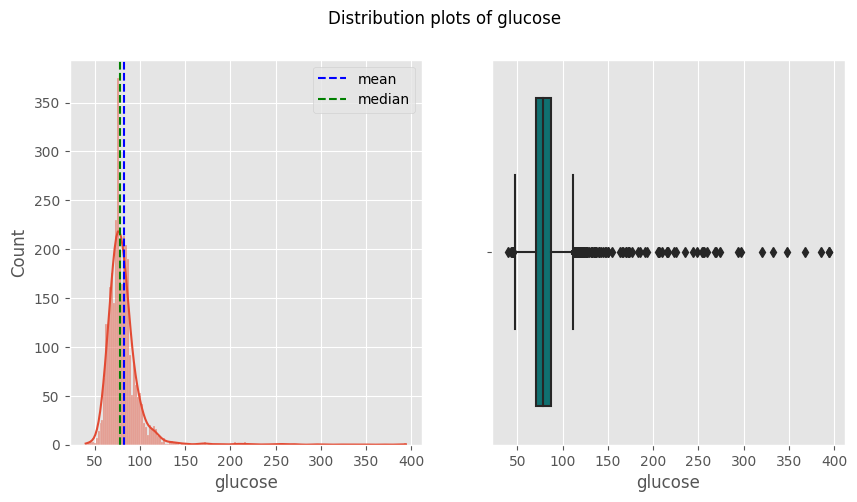

In [117]:
# Chart - 2 visualization code
# Distribution of numeric variables
for i in num_variables:
  fig,ax=plt.subplots(1,2,figsize=(10,5))
  sns.histplot(df[i],kde=True,ax=ax[0])
  ax[0].axvline(df[i].mean(),color='blue',linestyle='--',label='mean')
  ax[0].axvline(df[i].median(),color='green',linestyle='--',label='median')
  ax[0].legend()
  sns.boxplot(x=df[i],ax=ax[1],color='teal')
  fig.suptitle("Distribution plots of "+i)

##### 1. Why did you pick the specific chart?

We wanted to see the distribution of other numeric variables as it helps us to understand what kind of ML models to use. We have used histplot to understand nature of the distribution and used boxplot to know about statistical description about each of the variables, we also wanted to see the presence of outliers in each of these variables.

##### 2. What is/are the insight(s) found from the chart?

Most of the numerical variables seem to follow normal distribution with appreciable amount of skewness.There seems to be many outliers for different variables, we need to handle these outliers for better performance of our ML models.

#### Chart - 3

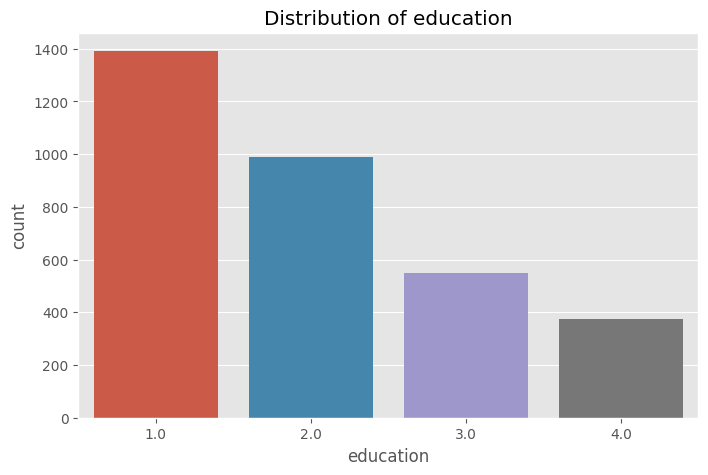

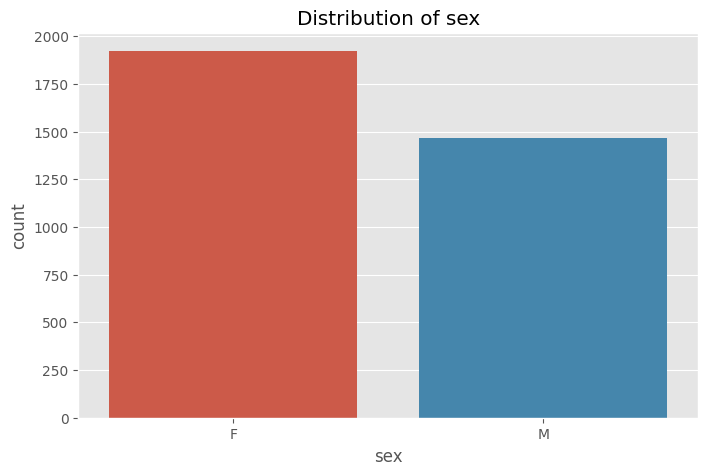

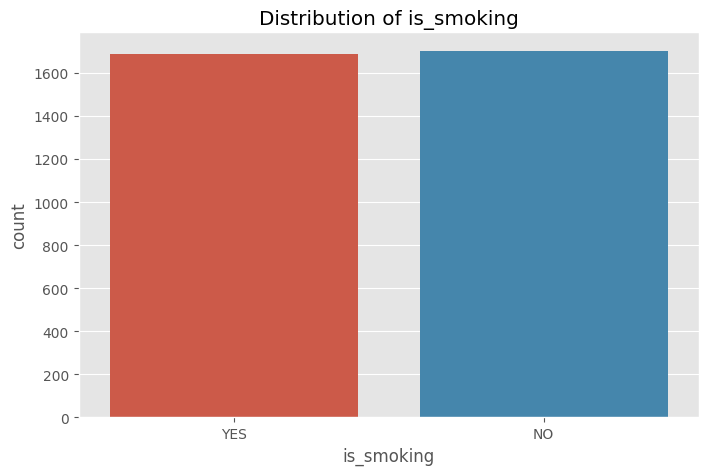

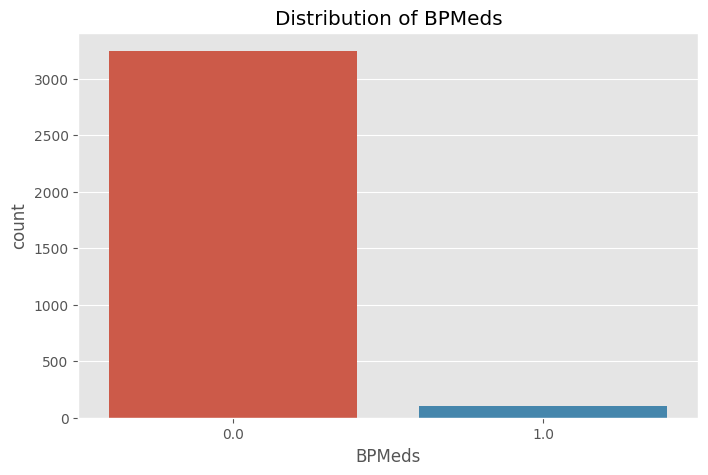

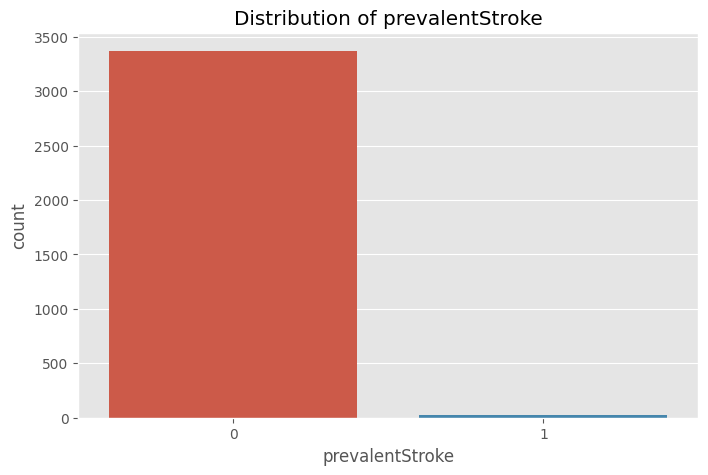

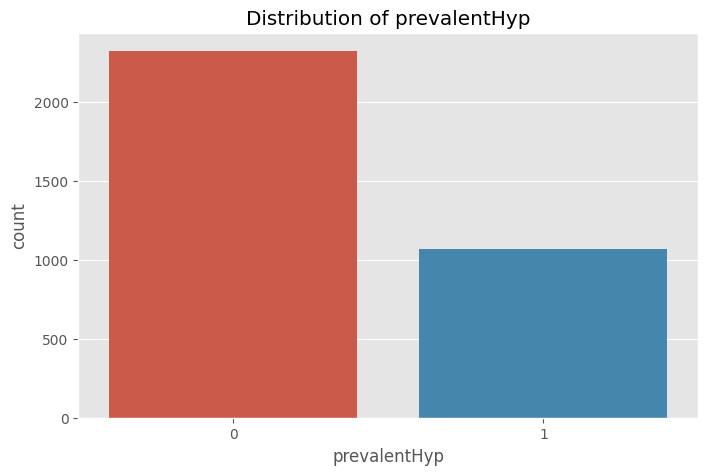

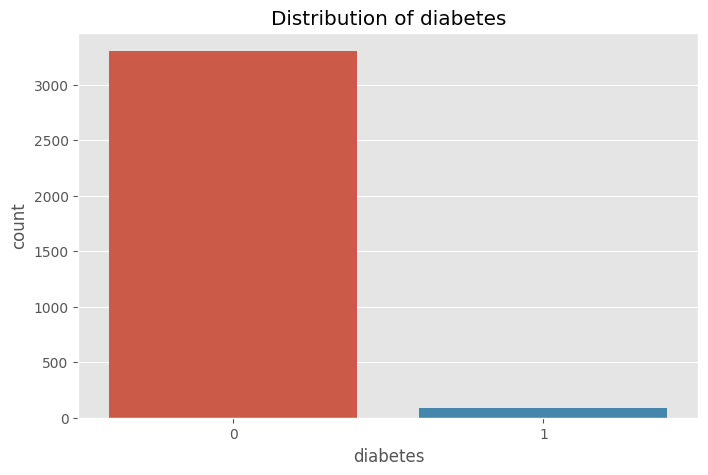

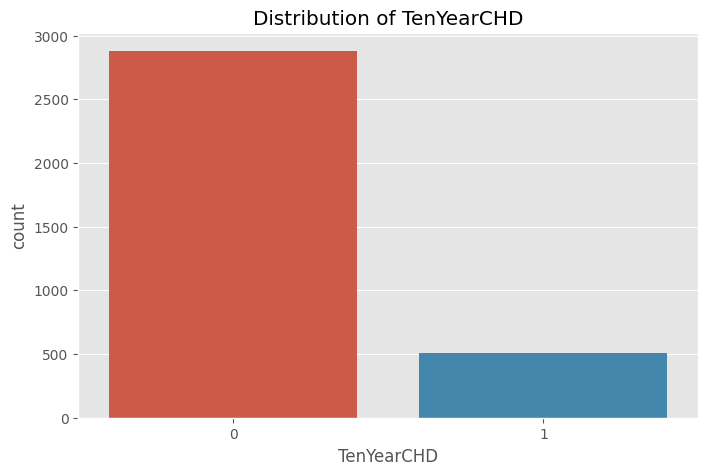

In [118]:
# Chart - 3 visualization code

# Distribution of categorical variables
for col in cat_variables:
  plt.figure(figsize=(8,5))
  sns.countplot(x=col,data=df)
  plt.title("Distribution of "+col)
  plt.show()

##### 1. Why did you pick the specific chart?

Here we have analysed the distribution of categorical variables, all of these categorical variables are demographic variables, we want to look into the distribution of these categorical variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are 7 categorical variables each of them provide some insight.
* From the distribution of education we infer that there are lot of people with education qualification of 1, less many people with education qualification of 4.
* From the distribution of sex variable we that there are more females than males.
* From the distribution of number of people smoking we see that there are equal number of people who smoke and who don't smoke.
* From the distribution of BP meds we see that there are very few people who take BP medication.
* From distribution of prevalent stroke we that that there are few people who suffer from prevalent stroke
* From distribution of prevalent hypertension we that that there are good number of people who suffer from prevalent hypertension but it is less than the number of people who don't suffer from prevalent hypertension.
* There are very few people who are diabetic.

#### Chart - 4

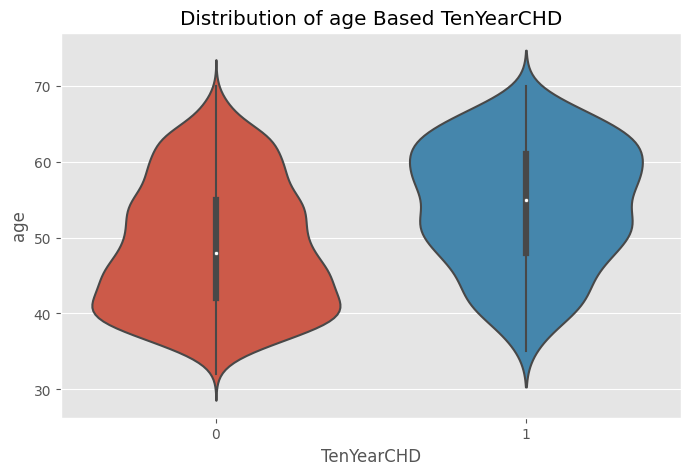

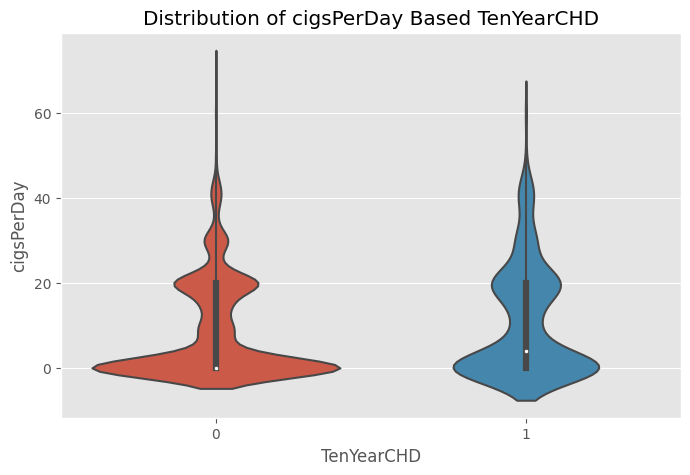

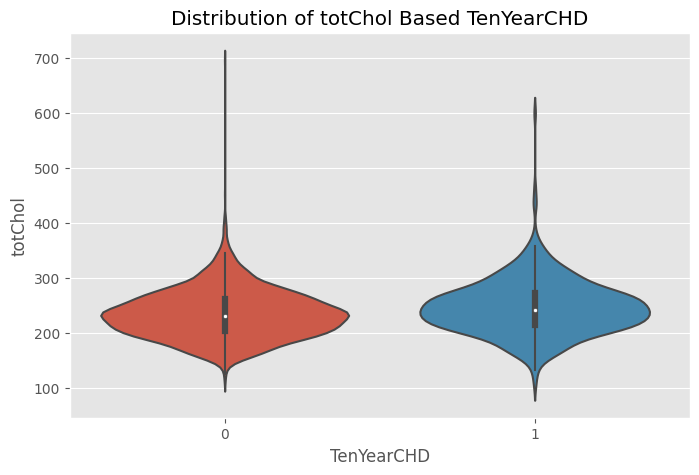

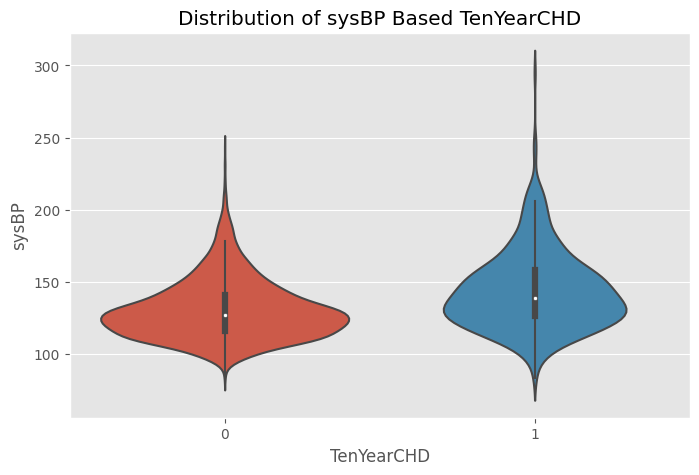

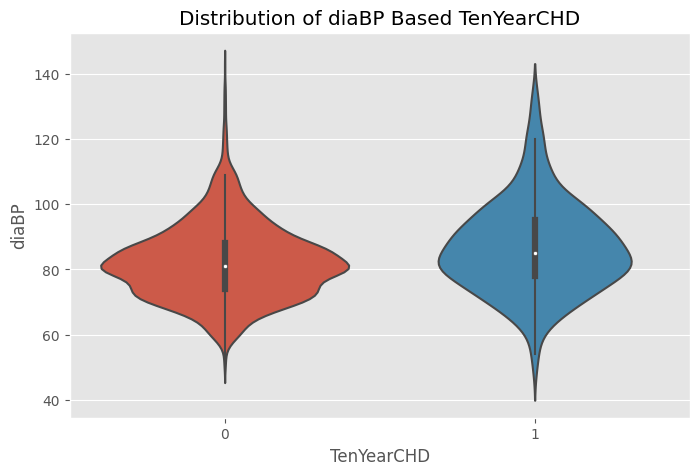

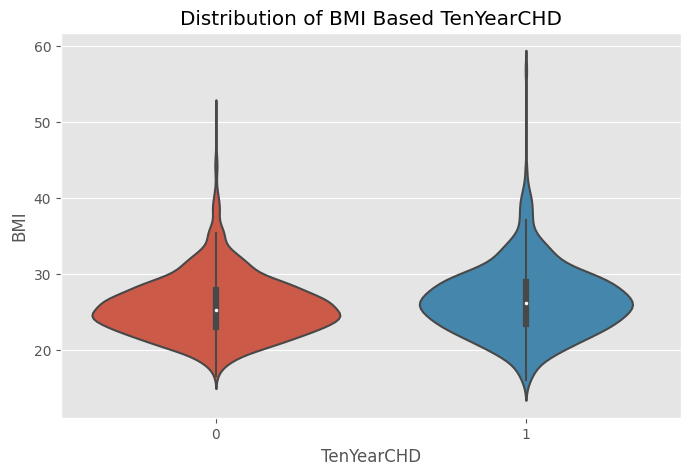

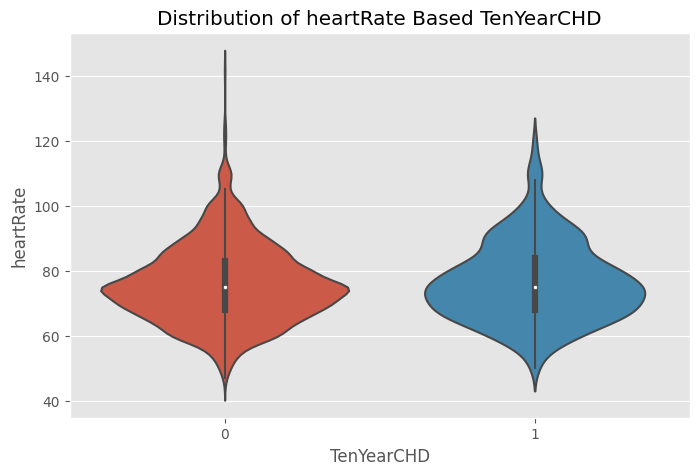

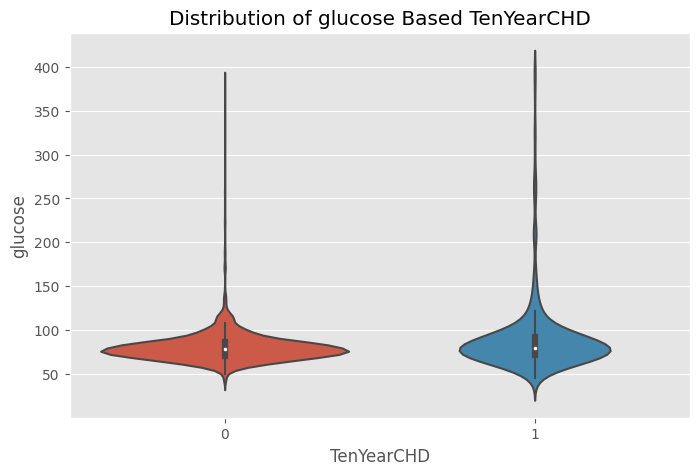

In [119]:
# Chart - 4 visualization code

# Distribution of numeric variables based on target variable
for col in num_variables:
  plt.figure(figsize=(8,5))
  sns.violinplot(x ='TenYearCHD', y = col, data = df)
  plt.title("Distribution of "+col +" Based TenYearCHD")

##### 1. Why did you pick the specific chart?

Here we are doing bivariate analysis of target variable with respect to various numeric variables, a violin plot is the best method to unserstand the relation between these two variables.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the above chart are:
* People with age around 60 have high risk of getting CHD(cornary heart disease)
* People with choestrol around 250 have high risk of getting CHD
* People with Sys BP around 125 have high risk of getting CHD
* People with dia BP of around 80 have high risk of getting CHD
* people with high risk of getting CHD have BMI around 25
* people with high risk of CHD have glucode level around 60

#### Chart - 5

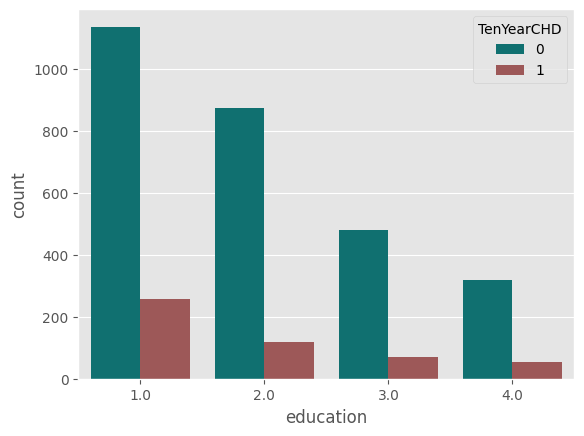

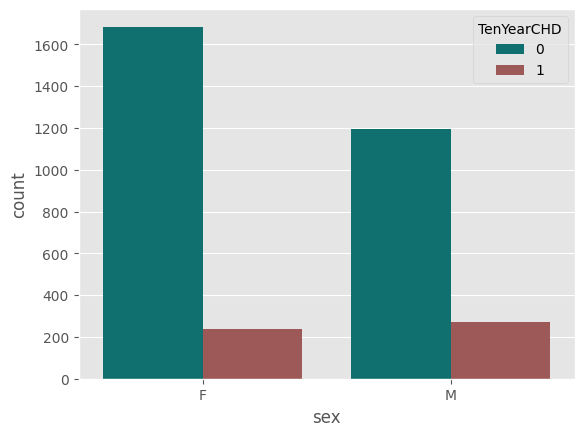

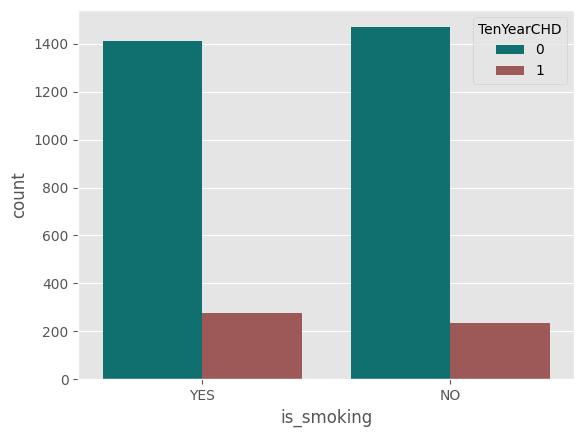

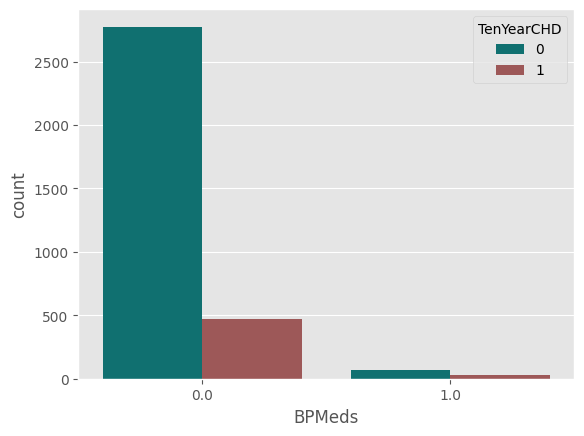

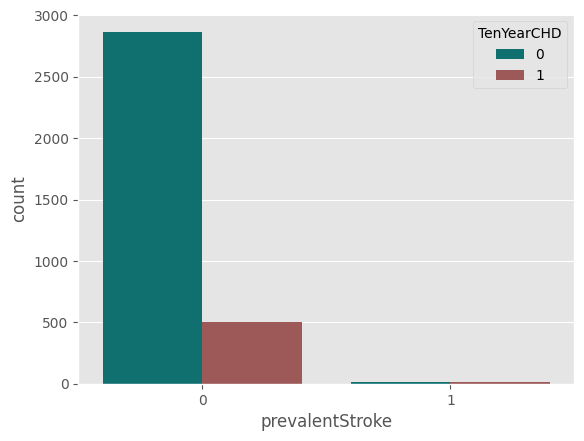

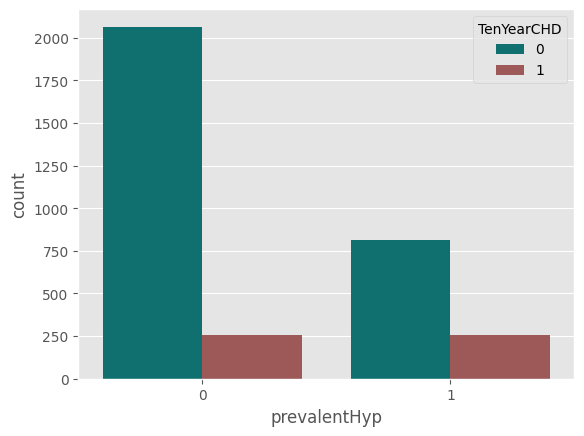

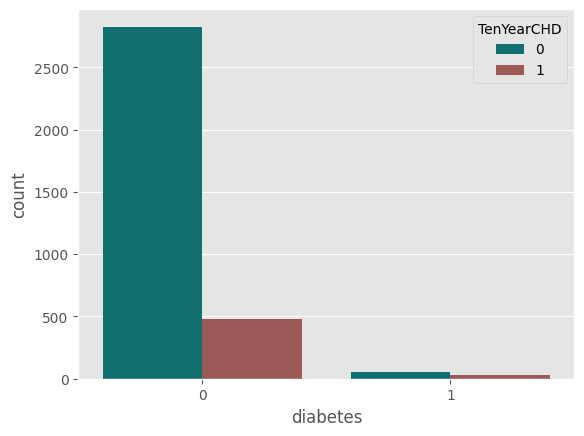

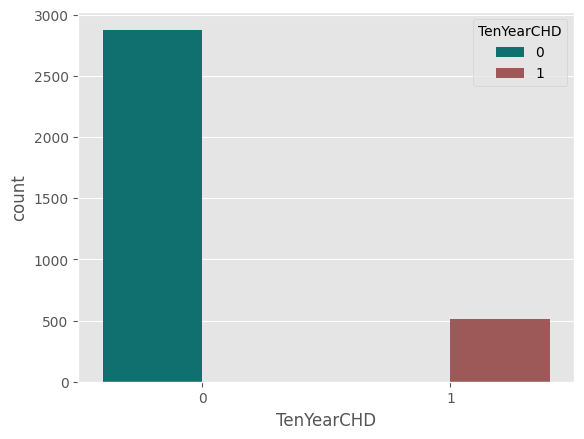

In [120]:
# Chart - 5 visualization code
# categorical variable vs target variable

palette={0:'teal',1:'#a94c4c'}
for col in cat_variables:
  plt.figure()
  sns.countplot(x=col,data=df,hue=df['TenYearCHD'],palette=palette)


##### 1. Why did you pick the specific chart?

In this charts we have done a bivariate analysis between categorical variables and our target variables using a bar plot to understand the behaviour of our categorical variables wrt target variable.

##### 2. What is/are the insight(s) found from the chart?

There are some insights which are found from above chart:
* Both male and female have equal number of CHD, suggesting that CHD is not gender specific.
* Equal number of people who smoke and people who don't smoke are affected by CHD, which might suggest that smoking does not cause CHD.
* 50 percent of the people who are in a risk of CHD suffere from prevelent hypertension.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From this insights we get an idea how demographics variables such as gender, age,education etc are related to CHD, we can create more awareness while spreading this information.

#### Chart - 6

In [121]:
# Chart - 6 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [122]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [123]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [124]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [125]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [126]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [127]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [128]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

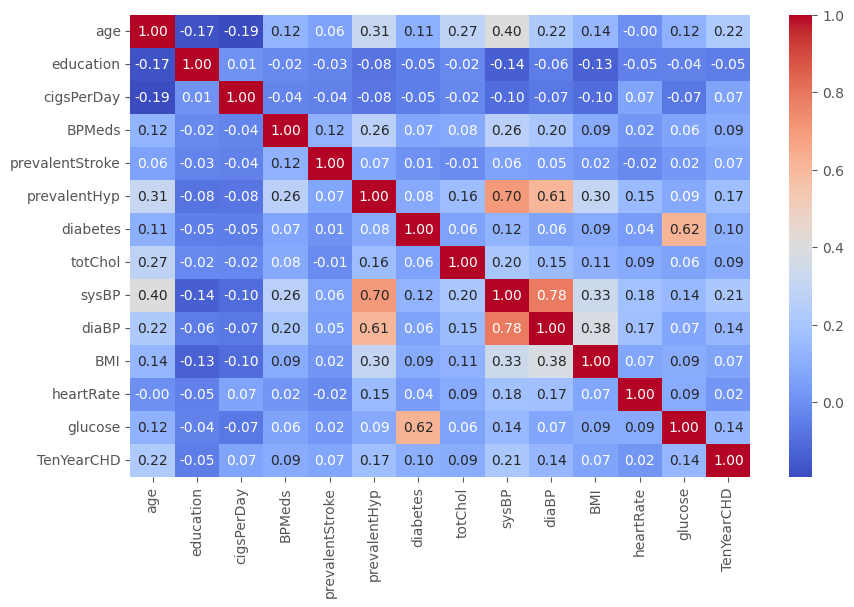

In [129]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='0.2f')
plt.show()

##### 1. Why did you pick the specific chart?

We picked this chart to understand the correlation between our variables, we don't want high multicolinearity between our variables as this can affect our ML models performance.

##### 2. What is/are the insight(s) found from the chart?

From the above charts we found that variables SysBP and DiaBP have high correlation, we also found variables glucose and diabetes have high correlation.

#### Chart - 15 - Pair Plot

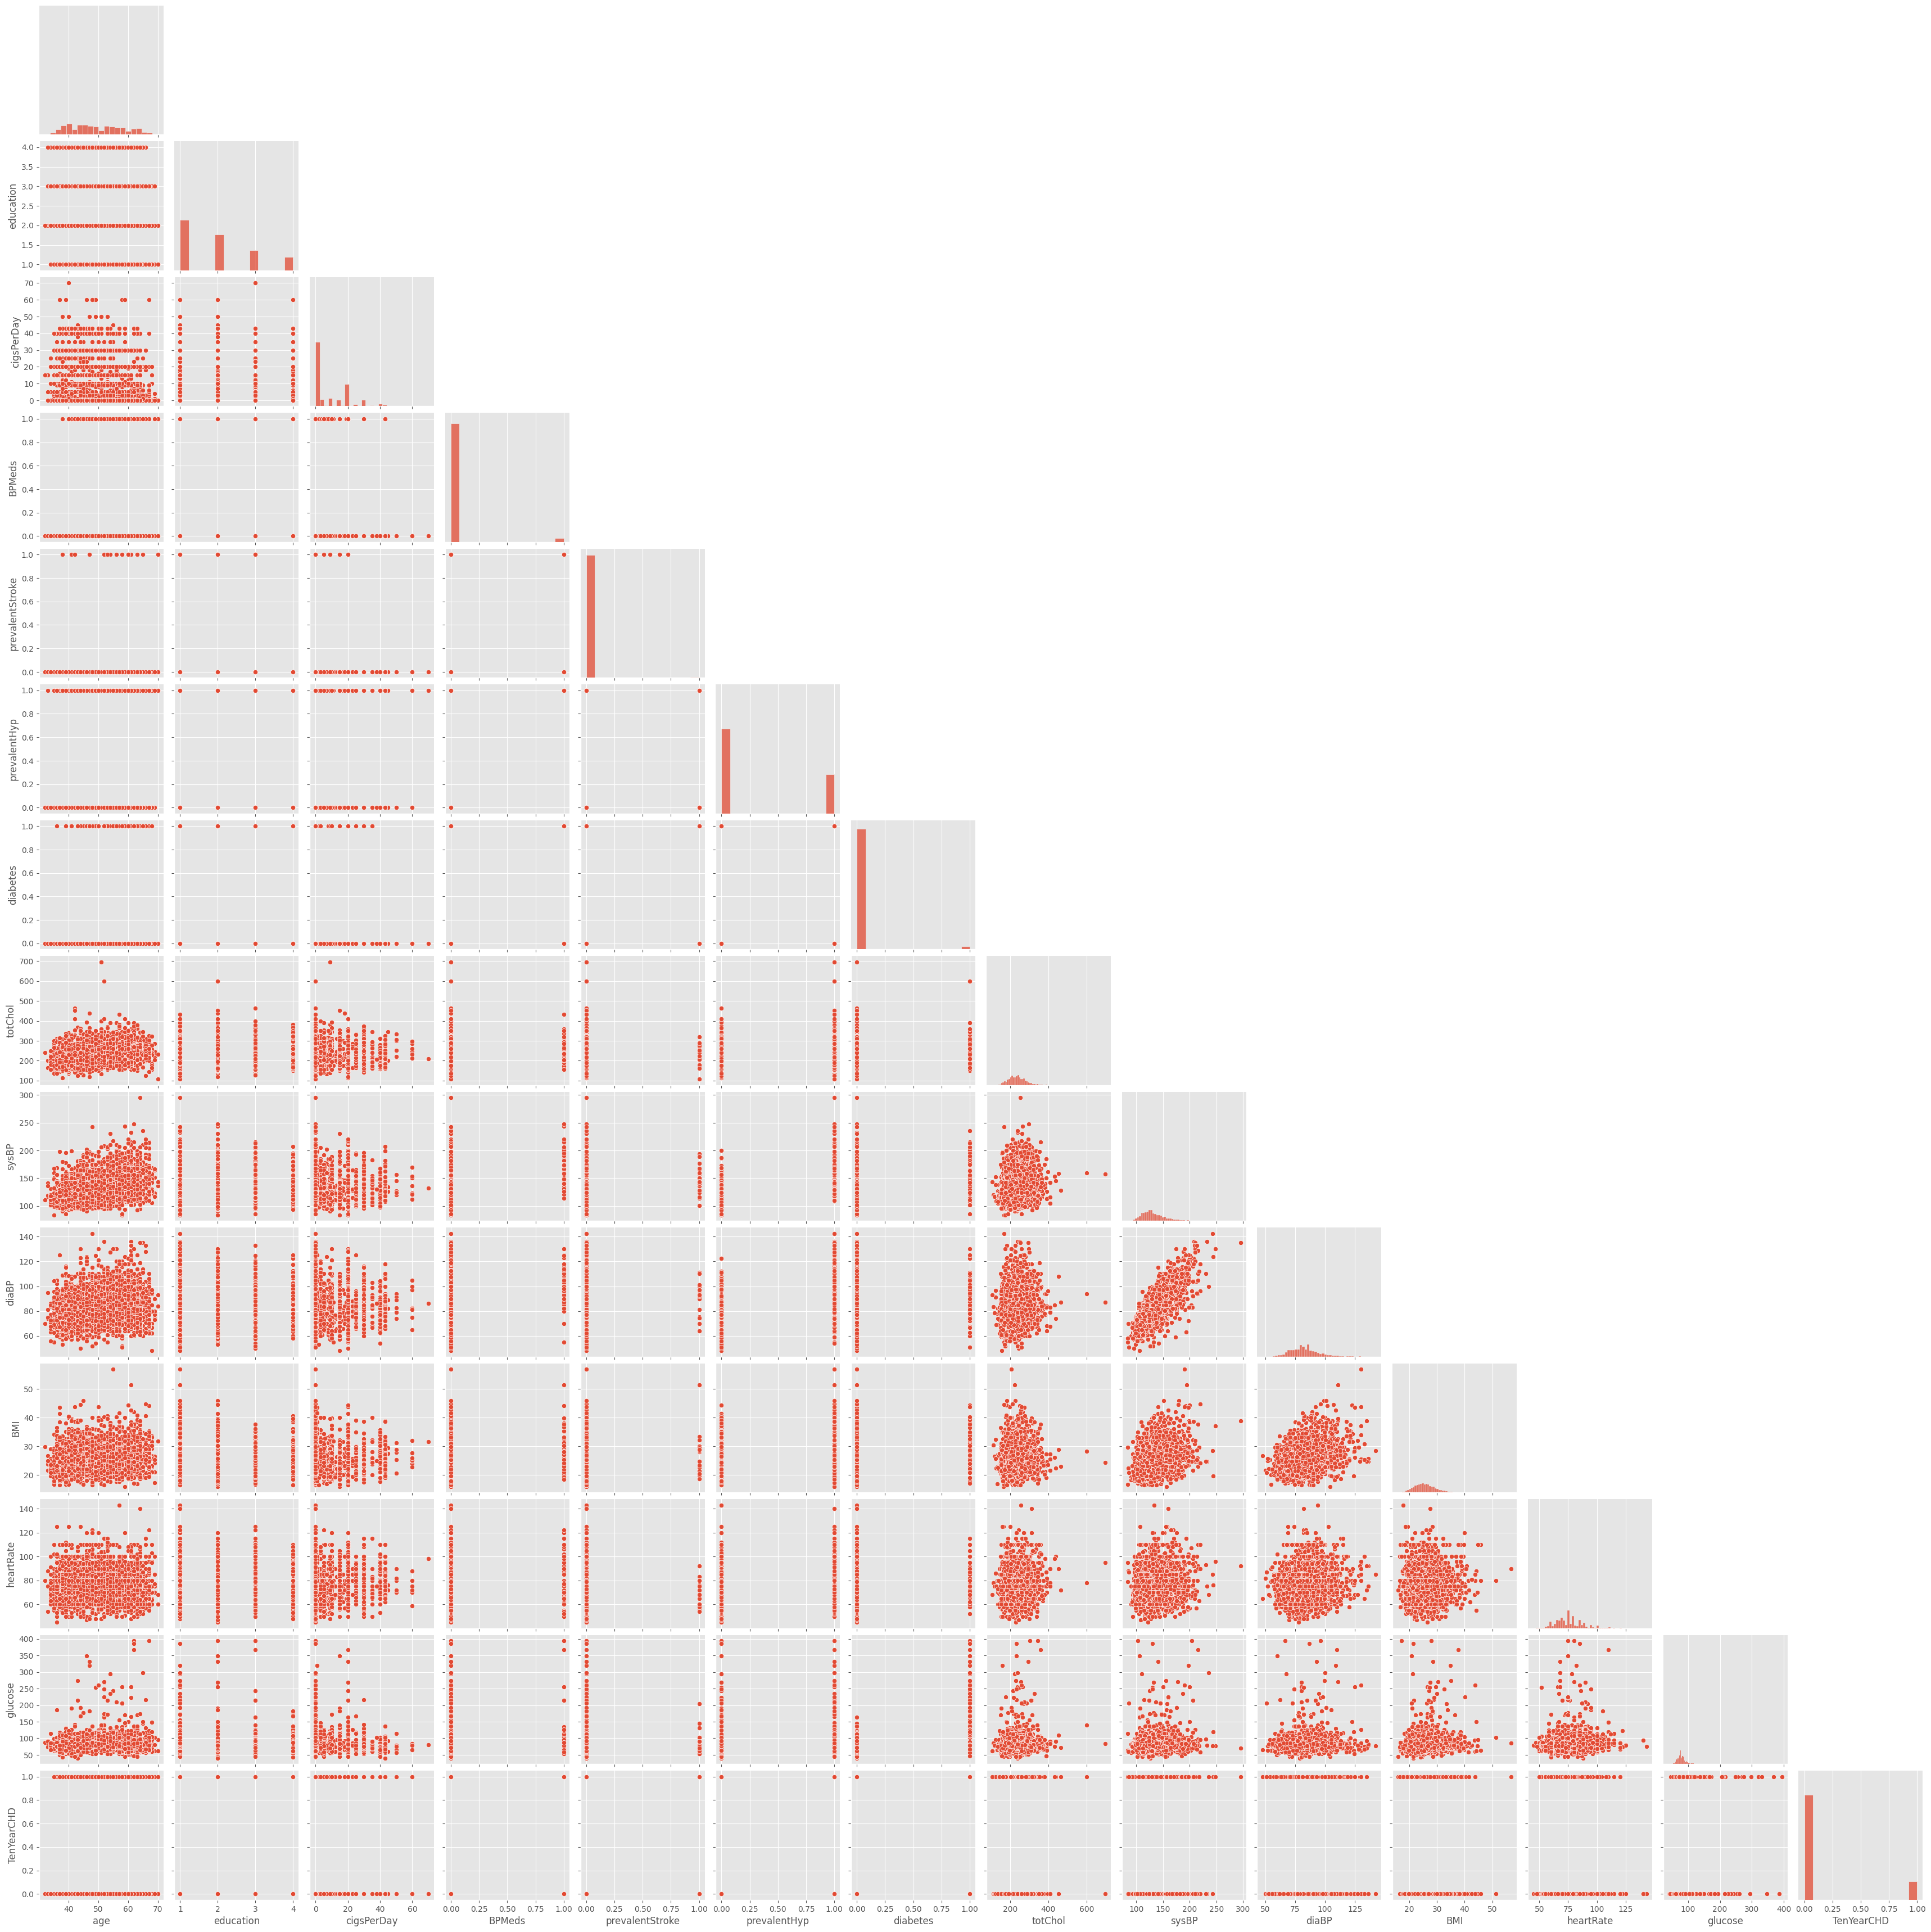

In [130]:
# Pair Plot visualization code
sns.pairplot(df,corner=True)

##### 1. Why did you pick the specific chart?

We have done multivariate analysis to understand relationship between each variables.

##### 2. What is/are the insight(s) found from the chart?

We find that variables SysBP and diaBP have linear relationship, which we also found in correlation plot.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

We define three Hypothetical statements
1. There is no association between education and CHD.
2. There is no association between gender and CHD.
3. There is no association between smoking and CHD.

* Here we have significance leel of 0.05.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis H0: There is no association between education and CHD
Alternative Hypothesis H1: There is association between education and CHD

#### 2. Perform an appropriate statistical test.

In [131]:
# Perform Statistical Test to obtain P-Value
cross_tab=pd.crosstab(df['education'],df['TenYearCHD'])
stat,p_value,dof,expected = chi2_contingency(cross_tab)
print(cross_tab)
print(f"The p_value obtained is {p_value}")

TenYearCHD     0    1
education            
1.0         1135  256
2.0          872  118
3.0          479   70
4.0          319   54
The p_value obtained is 6.038646749234552e-05


##### Which statistical test have you done to obtain P-Value?

We have done chi2 test to obtain p_value, the p_value obtained is way below our significance value of 0.05, hence we reject our null hypothesis that there is no association between education and CHD.

##### Why did you choose the specific statistical test?

We chose chi2 test, it is test which performs on categorical values, and tells us dependency of these categorical values.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: There is no association between gender and CHD
H1: There is association between gender and CHD

#### 2. Perform an appropriate statistical test.

In [132]:
# Perform Statistical Test to obtain P-Value
cross_tab=pd.crosstab(df['sex'],df['TenYearCHD'])
stat,p_value,dof,expected = chi2_contingency(cross_tab)
print(cross_tab)
print(f"The p_value obtained is {p_value}")


TenYearCHD     0    1
sex                  
F           1684  239
M           1195  272
The p_value obtained is 1.060878293561798e-06


##### Which statistical test have you done to obtain P-Value?

We have done chi2 test to obtain p_value, the p_value obtained is way below our significance value of 0.05, hence we reject our null hypothesis that there is no association between gender and CHD.

##### Why did you choose the specific statistical test?

We chose chi2 test, it is test which performs on categorical values, and tells us dependency of these categorical values.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: There is no association between smoking and CHD.
H1: There is association between smoking and CHD.

#### 2. Perform an appropriate statistical test.

In [133]:
# Perform Statistical Test to obtain P-Value
cross_tab=pd.crosstab(df['is_smoking'],df['TenYearCHD'])
stat,p_value,dof,expected = chi2_contingency(cross_tab)
print(cross_tab)
print(f"The p_value obtained is {p_value}")


TenYearCHD     0    1
is_smoking           
NO          1467  236
YES         1412  275
The p_value obtained is 0.05239062274853224


##### Which statistical test have you done to obtain P-Value?

We have done chi2 test to obtain p_value, the p_value obtained is higher than our significance value of 0.05, hence fail reject our null hypothesis that there is no association between smoking and CHD.

##### Why did you choose the specific statistical test?

We chose chi2 test, it is test which performs on categorical values, and tells us dependency of these categorical values.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [134]:
# Handling Missing Values & Missing Value Imputation

# looking into null values
df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [135]:
# Handling Missing Values & Missing Value Imputation

# education
df['education']=df['education'].fillna(df['education'].mode()[0])
# BPMeds
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])
# totchol
df['totChol']=df['totChol'].fillna(df['totChol'].median())
# BMI
df['BMI']=df['BMI'].fillna(df['BMI'].median())
# HeartRate
df['heartRate']=df['heartRate'].fillna(df['heartRate'].median())

In [136]:
# cigsperday
print("The median of number of cigs per day is:",df['cigsPerDay'].median())
df.loc[df['cigsPerDay'].isna()].head()

The median of number of cigs per day is: 0.0


,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,55,1.0,F,YES,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,M,YES,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,M,YES,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,1.0,F,YES,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,F,YES,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0


If we look into nan values in 'cigsPerDay' column we see that the person is smoking it does not make sense to replace the nan values with median as median is zero.

In [137]:
# cigsperday
median_cigs=df.loc[df['is_smoking']=='YES']['cigsPerDay'].median()
df['cigsPerDay']=df['cigsPerDay'].fillna(median_cigs)

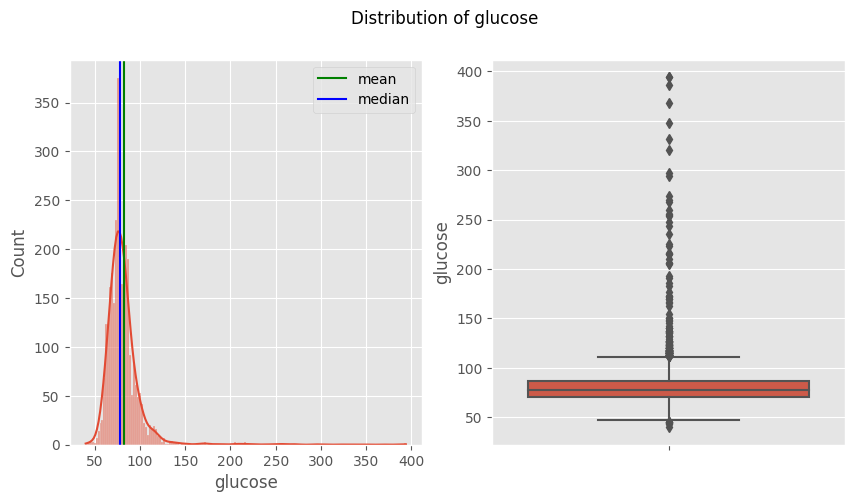

In [138]:
# glucose levels
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['glucose'],kde=True,ax=ax[0])
ax[0].axvline(df['glucose'].mean(),label='mean',color='green')
ax[0].axvline(df['glucose'].median(),label='median',color='blue')
ax[0].legend()
sns.boxplot(y=df['glucose'],ax=ax[1])
fig.suptitle("Distribution of glucose")
plt.show()

There are many outliers in glucose column, the distribution is right skewed.  There are large numbers of nan values and replacing them with median will change the distribution and will give bad results, so we replace them using **knn imputer** .

In [139]:
# converting object into numeric variables
df['is_smoking']=df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)
df['sex']=df['sex'].apply(lambda x: 1 if x=='M' else 0)

In [140]:
# applying knn imputation in glucose levels
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=8)
imputer.fit(df)
imputed_values=imputer.transform(df)
df=pd.DataFrame(imputed_values,columns=df.columns)

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have dropped the rows having null values since there is few percentage of null values.

### 2. Handling Outliers

In [141]:
# Handling Outliers & Outlier treatments
for num_col in num_variables:
  Q1=df[num_col].quantile(0.25)
  Q3=df[num_col].quantile(0.75)
  iqr=Q3-Q1
  upper_limit=Q3+1.5*iqr
  lower_limit=Q1-1.5*iqr
  df[num_col]=df[num_col].apply(lambda x: upper_limit if x>upper_limit else lower_limit if x<lower_limit else x) # here we set high value to upper limit and low values to lower limit

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have used IQR method for outlier treatment where we set an upper_limit and lower limit, for values higher than upper_limit replace them with upper_limit, similar method for values lower than lower_limit.

### 3. Categorical Encoding

In [142]:
# let us make copy of original dataframe
chd_df=df.copy()

In [143]:
# Encode your categorical columns
#print(df.describe(include=['object']).columns) # categorical columns
#print(cat_variables)
chd_df=pd.get_dummies(df,columns=['education'],drop_first=True)
chd_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_2.0,education_3.0,education_4.0
0,64.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,25.38,90.0,80.0,1.0,1,0,0
1,36.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0.0,0,0,1
2,46.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.35,88.0,94.0,0.0,0,0,0
3,50.0,1.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,158.0,88.0,28.26,68.0,94.0,1.0,0,0,0
4,64.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.42,70.0,77.0,0.0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

We have used One Hot Encoding to all the categorical variables, and the dropped the first variable to avoid dummy variable trap.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [144]:
num_variables=list(chd_df.describe().columns)
num_variables

['age',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD',
 'education_2.0',
 'education_3.0',
 'education_4.0']

<Axes: >

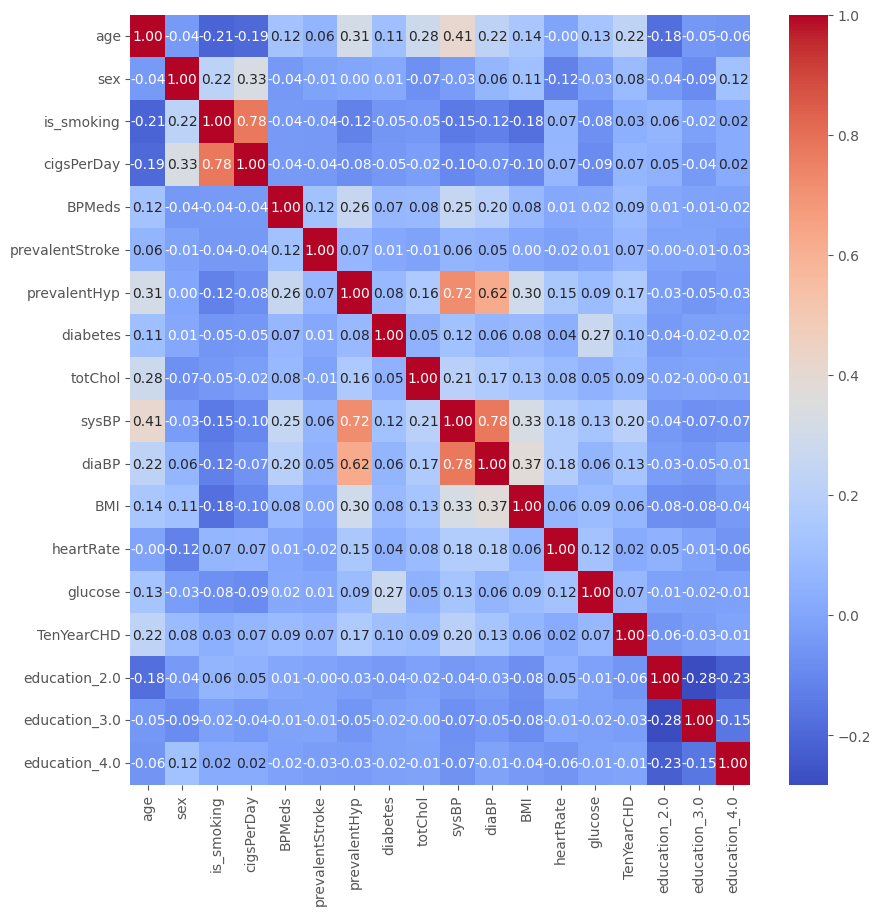

In [145]:
# Manipulate Features to minimize feature correlation and create new features

# correlation plot
plt.figure(figsize=(10,10))
sns.heatmap(chd_df.corr(),cmap='coolwarm',annot=True,fmt='0.2f')

In [146]:
# Vif method
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X):
  vif_df=pd.DataFrame()
  vif_df['Variables']=X.columns
  vif_df['VIF']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
  return vif_df



In [147]:
vif(chd_df[[col for col in num_variables if col not in ['TenYearCHD']]])

,Variables,VIF
0,age,44.734778
1,sex,2.178026
2,is_smoking,5.145326
3,cigsPerDay,4.447197
4,BPMeds,1.133270
5,prevalentStroke,1.027063
6,prevalentHyp,2.503548
7,diabetes,1.100509
8,totChol,34.391989
9,sysBP,156.629415


In [148]:
# not including 'DiaBP'
chd_df['pulse_pressure']=(chd_df['sysBP']-chd_df['diaBP'])
num_variables.append('pulse_pressure')
vif(chd_df[[col for col in num_variables if col not in ['TenYearCHD','diaBP','sysBP','is_smoking']]])

,Variables,VIF
0,age,43.339178
1,sex,2.151618
2,cigsPerDay,1.924635
3,BPMeds,1.131039
4,prevalentStroke,1.026554
5,prevalentHyp,2.145471
6,diabetes,1.093089
7,totChol,33.630401
8,BMI,42.879850
9,heartRate,39.418111


#### 2. Feature Selection

In [149]:
# Select your features wisely to avoid overfitting
chd_df.drop(['is_smoking','sysBP','diaBP'],axis=1,inplace=True)


In [150]:
chd_df.shape

(3390, 16)

In [151]:
chd_df.columns

Index(['age', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose', 'TenYearCHD',
       'education_2.0', 'education_3.0', 'education_4.0', 'pulse_pressure'],
      dtype='object')

##### What all feature selection methods have you used  and why?

* We have used VIF method to reduce the number of multicollinear features, we have found that sysBP and diaBP are correlated we removed this features and added new feature BP to describe the working of these two features.

* We have also removed 'is_smoking' as this feature and feature cigsPerDay explain the same thing.

##### Which all features you found important and why?

The features which we found important are 'age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'education, 'BP', 'sex_M', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes' as these variables are not correlated to each other and contain important information which will able to predict the risk of patient getting a CHD.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [152]:
# Transform Your data

# creating independent and predicted variables
X=chd_df.drop('TenYearCHD',axis=1)
y=chd_df['TenYearCHD']



### 6. Data Scaling

In [153]:
# Scaling your data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Here we already reduced the features, no further reduction of features is needed.

### 8. Data Splitting

In [154]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

##### What data splitting ratio have you used and why?

I have used 80:20 ratio on Train and Test data

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes the data is imbalanced as there very few people in the data set who have been labelled as 1, i.e, risk of getting a CHD

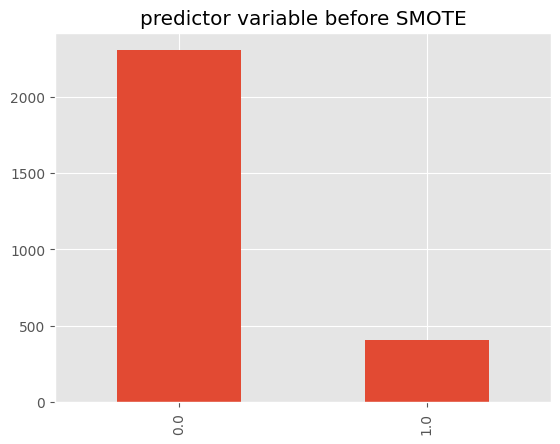

In [155]:
# before handling imbalanced data
y_train.value_counts().plot.bar(title='predictor variable before SMOTE')
plt.show()

In [156]:
# Handling Imbalanced Dataset (If needed)
smt = SMOTETomek(random_state=42)
X_res_tr, y_res_tr = smt.fit_resample(X_train, y_train)

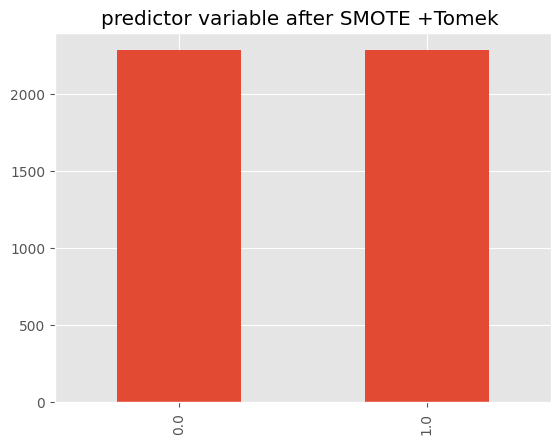

In [157]:
y_res_tr.value_counts().plot.bar(title='predictor variable after SMOTE +Tomek ')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We have used SMOTE along with Tomek links to handle imbalance dataset, we have used tomek links to improve our classification strength and SMOTE to handle the imbalance dataset.

## ***7. ML Model Implementation***

In [158]:
# ML model function to calculate scores
def model_scores(model,X_train,X_test,y_train,y_test):
  model.fit(X_train,y_train) # fitting the model

  y_pred_tr=model.predict(X_train) # predicted train labels
  y_pred_tst=model.predict(X_test) # predicted test labels

  y_prob_tr=model.predict_proba(X_train)[:,1] # probability va;ues for train
  y_prob_tst=model.predict_proba(X_test)[:,1] # probability values for test

  # calculating roc_auc scores
  roc_auc_tr=roc_auc_score(y_train,y_prob_tr)
  roc_auc_tst=roc_auc_score(y_test,y_prob_tst)
  print(" ROc-AUC score for train data is", roc_auc_tr)
  print(" ROC-AUC score for test data is",roc_auc_tst)

  # plotting roc_auc curve
  fpr_tr,tpr_tr,thresholds_tr=roc_curve(y_train,y_prob_tr)   # roc_curve for train
  fpr_tst,tpr_tst,thresholds_tst=roc_curve(y_test,y_prob_tst) # roc_curve for test
  plt.plot(fpr_tr,tpr_tr,label='roc_auc curve for train')
  plt.plot(fpr_tst,tpr_tst,label='roc_curve for test')
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.legend()
  plt.show()

  # plotting confusion matrix for train and test data.
  cm_train=confusion_matrix(y_train,y_pred_tr)
  cm_test=confusion_matrix(y_test,y_pred_tst)

  fig,ax=plt.subplots(1,2,figsize=(10,5))
  # cm for train data
  sns.heatmap(cm_train,annot=True,xticklabels=['False','True'],yticklabels=['False','True'],ax=ax[0])
  ax[0].set_xlabel("Predicted labels")
  ax[0].set_ylabel("True labels")
  ax[0].set_title("Confusion matrix for Train Data")

  # cm for test data
  sns.heatmap(cm_test,annot=True,xticklabels=['False','True'],yticklabels=['False','True'],ax=ax[1])
  ax[1].set_xlabel("Predicted labels")
  ax[1].set_ylabel("True labels")
  ax[1].set_title("Confusion matrix for Test Data")
  plt.show()

  # classification report
  target_names=[0,1]
  clr_tr=classification_report(y_train,y_pred_tr,target_names=target_names,output_dict=True)
  clr_tst=classification_report(y_test,y_pred_tst,target_names=target_names,output_dict=True)
  clr_tr_df=pd.DataFrame(clr_tr).T
  clr_tst_df=pd.DataFrame(clr_tst).T
  print("\n\nThe classification report for train data is:\n\n",clr_tr_df)
  print("\n\nThe classification report for test data is:\n\n",clr_tst_df)

  # calculating all scores and storing it in a list
  precision_train=clr_tr['macro avg']['precision']
  precision_tst=clr_tst['macro avg']['precision']

  recall_tr=clr_tr['macro avg']['recall']
  recall_tst=clr_tst['macro avg']['recall']

  acc_tr=accuracy_score(y_train,y_pred_tr)
  acc_tst=accuracy_score(y_test,y_pred_tst)

  f1_tr=clr_tr['macro avg']['f1-score']
  f1_tst=clr_tst['macro avg']['f1-score']

  model_metric=[precision_train,precision_tst,recall_tr,recall_tst,roc_auc_tr,roc_auc_tst,acc_tr,acc_tst,f1_tr,f1_tst]

  return model_metric






















## Logistic Regression

In [159]:
# ML Model - 1 Implementation
log_reg=LogisticRegression(fit_intercept=True,max_iter=10000)


In [160]:
# defing dataframe to store ml models performance metrics
model_df=pd.DataFrame(index=['precision_train','precision_test','recall_train','recall_test','roc_auc_train','roc_auc_test','accuracy_train','accuracy_test','f1_train','f1_test'])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 ROc-AUC score for train data is 0.7319520754969157
 ROC-AUC score for test data is 0.7228179466230937


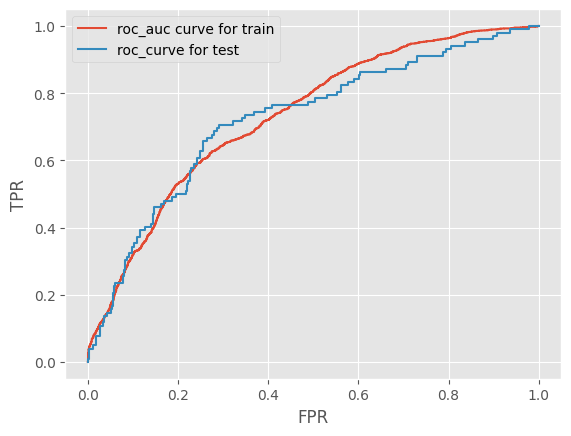

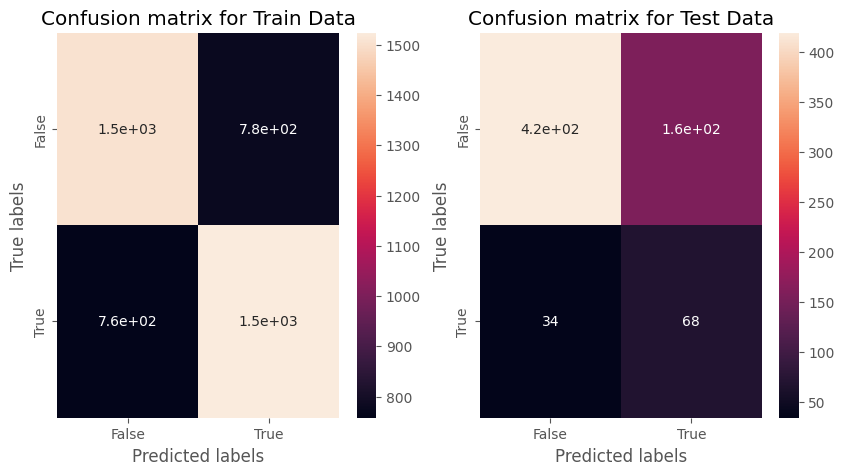



The classification report for train data is:

               precision    recall  f1-score      support
0              0.665046  0.659509  0.662266  2282.000000
1              0.662321  0.667835  0.665067  2282.000000
accuracy       0.663672  0.663672  0.663672     0.663672
macro avg      0.663684  0.663672  0.663666  4564.000000
weighted avg   0.663684  0.663672  0.663666  4564.000000


The classification report for test data is:

               precision    recall  f1-score     support
0              0.924945  0.727431  0.814383  576.000000
1              0.302222  0.666667  0.415902  102.000000
accuracy       0.718289  0.718289  0.718289    0.718289
macro avg      0.613584  0.697049  0.615143  678.000000
weighted avg   0.831261  0.718289  0.754434  678.000000


In [161]:
# Visualizing evaluation Metric Score chart
log_scores=model_scores(log_reg,X_res_tr,X_test,y_res_tr,y_test)

In [162]:
model_df['Logistic Regression']=log_scores
model_df

,Logistic Regression
precision_train,0.663684
precision_test,0.613584
recall_train,0.663672
recall_test,0.697049
roc_auc_train,0.731952
roc_auc_test,0.722818
accuracy_train,0.663672
accuracy_test,0.718289
f1_train,0.663666
f1_test,0.615143


#### 2. Cross- Validation & Hyperparameter Tuning

In [163]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
param_grid={'C':[100,10,1,0.1,0.01,0.001,0.0001]}
log_reg=LogisticRegression(fit_intercept=True,max_iter=10000)
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
log_grid=GridSearchCV(log_reg,param_grid=param_grid,cv=skf,scoring='recall')

# Fit the Algorithm
log_grid.fit(X_res_tr,y_res_tr)
print(log_grid.best_params_)
log_optimal=log_grid.best_estimator_

# Predict on the model


{'C': 100}


 ROc-AUC score for train data is 0.7319597566905117
 ROC-AUC score for test data is 0.7229030501089324


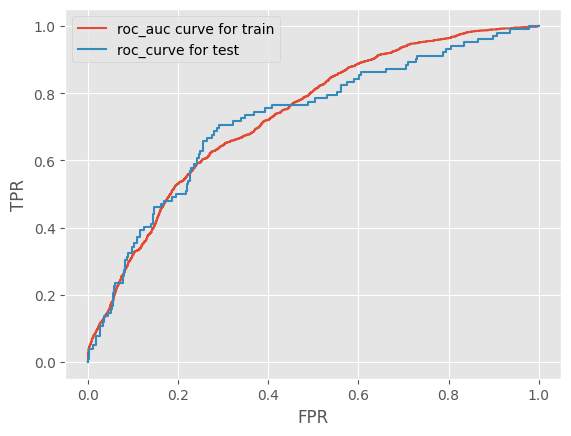

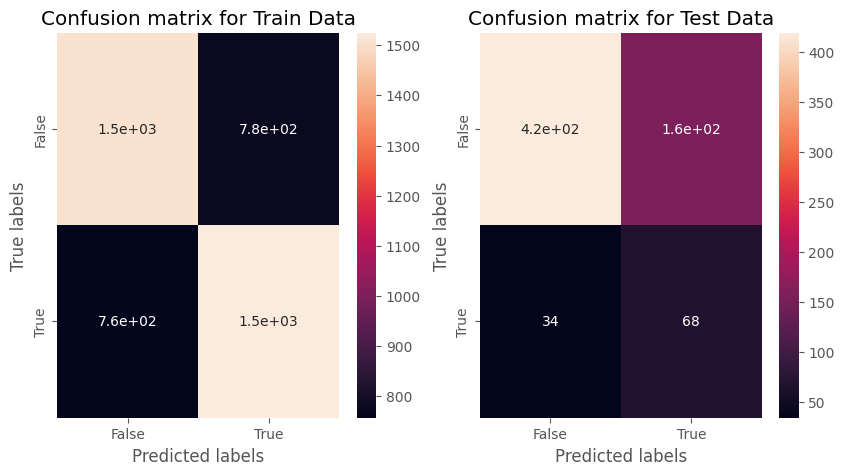



The classification report for train data is:

               precision    recall  f1-score      support
0              0.665340  0.659509  0.662412  2282.000000
1              0.662467  0.668273  0.665358  2282.000000
accuracy       0.663891  0.663891  0.663891     0.663891
macro avg      0.663904  0.663891  0.663885  4564.000000
weighted avg   0.663904  0.663891  0.663885  4564.000000


The classification report for test data is:

               precision    recall  f1-score     support
0              0.924945  0.727431  0.814383  576.000000
1              0.302222  0.666667  0.415902  102.000000
accuracy       0.718289  0.718289  0.718289    0.718289
macro avg      0.613584  0.697049  0.615143  678.000000
weighted avg   0.831261  0.718289  0.754434  678.000000


In [164]:
# visualizing metric scores
log_reg_tuned=model_scores(log_optimal,X_res_tr,X_test,y_res_tr,y_test)

In [165]:
# Evaluation metric score chart
model_df['Logistic Regression tuned']=log_reg_tuned

In [166]:
model_df

,Logistic Regression,Logistic Regression tuned
precision_train,0.663684,0.663904
precision_test,0.613584,0.613584
recall_train,0.663672,0.663891
recall_test,0.697049,0.697049
roc_auc_train,0.731952,0.731960
roc_auc_test,0.722818,0.722903
accuracy_train,0.663672,0.663891
accuracy_test,0.718289,0.718289
f1_train,0.663666,0.663885
f1_test,0.615143,0.615143


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV with different values of 'C' as our hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From evaluation metric score chart we found no significant improvemnt in the preformance of the model.

## Knn

In [167]:
# knn implementation
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 ROc-AUC score for train data is 0.9870013081072695
 ROC-AUC score for test data is 0.6089494825708062


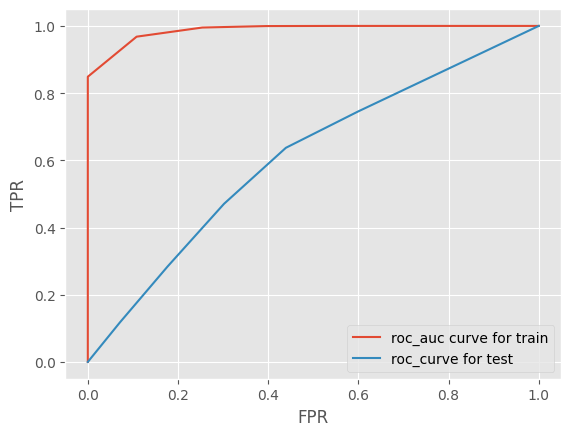

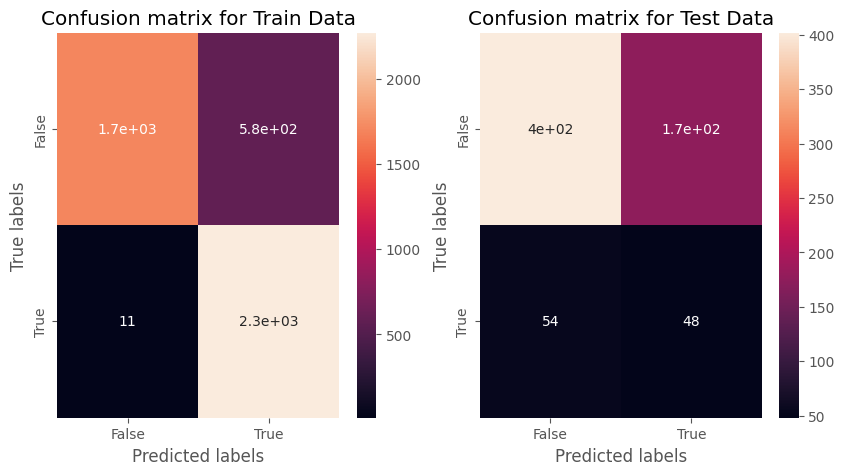



The classification report for train data is:

               precision    recall  f1-score      support
0              0.993582  0.746275  0.852352  2282.000000
1              0.796842  0.995180  0.885035  2282.000000
accuracy       0.870727  0.870727  0.870727     0.870727
macro avg      0.895212  0.870727  0.868694  4564.000000
weighted avg   0.895212  0.870727  0.868694  4564.000000


The classification report for test data is:

               precision    recall  f1-score     support
0              0.881579  0.697917  0.779070  576.000000
1              0.216216  0.470588  0.296296  102.000000
accuracy       0.663717  0.663717  0.663717    0.663717
macro avg      0.548898  0.584252  0.537683  678.000000
weighted avg   0.781480  0.663717  0.706440  678.000000


In [168]:
# Visualizing evaluation Metric Score chart
knn_scores=model_scores(knn,X_res_tr,X_test,y_res_tr,y_test)

In [169]:
# Evaluation metric score chart
model_df['KNearestNeighbors']=knn_scores
model_df

,Logistic Regression,Logistic Regression tuned,KNearestNeighbors
precision_train,0.663684,0.663904,0.895212
precision_test,0.613584,0.613584,0.548898
recall_train,0.663672,0.663891,0.870727
recall_test,0.697049,0.697049,0.584252
roc_auc_train,0.731952,0.731960,0.987001
roc_auc_test,0.722818,0.722903,0.608949
accuracy_train,0.663672,0.663891,0.870727
accuracy_test,0.718289,0.718289,0.663717
f1_train,0.663666,0.663885,0.868694
f1_test,0.615143,0.615143,0.537683


#### 2. Cross- Validation & Hyperparameter Tuning

In [170]:
# finding best k value
recall_tr=[]
recall_tst=[]
for i in range(1,68):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_res_tr,y_res_tr)
  y_pred_knn_tr=knn.predict(X_res_tr)
  y_pred_knn_tst=knn.predict(X_test)
  recall_score_tr=recall_score(y_res_tr,y_pred_knn_tr)
  recall_score_tst=recall_score(y_test,y_pred_knn_tst)
  recall_tr.append(recall_score_tr)
  recall_tst.append(recall_score_tst)


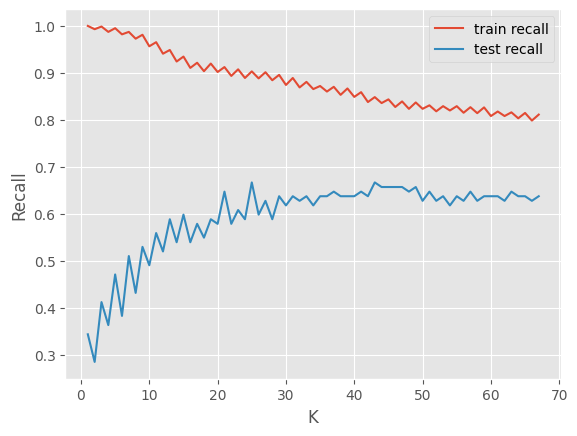

In [171]:
k_values=range(1,68)
plt.plot(k_values,recall_tr,label='train recall')
plt.plot(k_values,recall_tst,label='test recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.show()


In [172]:
# best value of k
best_k=recall_tst.index(max(recall_tst))
print(best_k)

24


In [173]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

param_grid={'n_neighbors':[24],
            'weights':['uniform','distance'],
            'metric':['minkowski','euclidiean','manhattan']}
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
knn=KNeighborsClassifier()
knn_grid=GridSearchCV(knn,param_grid=param_grid,cv=skf,scoring='recall')

# Fit the Algorithm
knn_grid.fit(X_res_tr,y_res_tr)
print(knn_grid.best_params_)
knn_optimal=knn_grid.best_estimator_


{'metric': 'minkowski', 'n_neighbors': 24, 'weights': 'distance'}


 ROc-AUC score for train data is 1.0
 ROC-AUC score for test data is 0.636020901416122


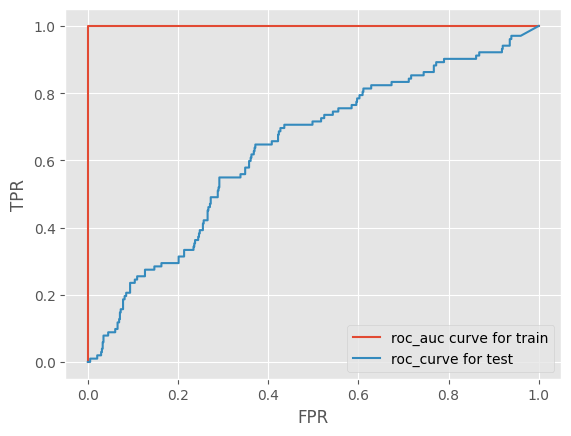

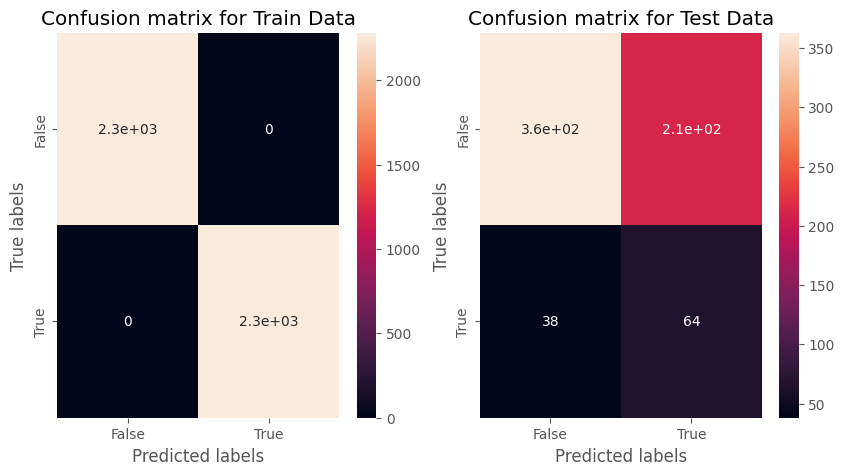



The classification report for train data is:

               precision  recall  f1-score  support
0                   1.0     1.0       1.0   2282.0
1                   1.0     1.0       1.0   2282.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   4564.0
weighted avg        1.0     1.0       1.0   4564.0


The classification report for test data is:

               precision    recall  f1-score     support
0              0.905237  0.630208  0.743091  576.000000
1              0.231047  0.627451  0.337731  102.000000
accuracy       0.629794  0.629794  0.629794    0.629794
macro avg      0.568142  0.628830  0.540411  678.000000
weighted avg   0.803810  0.629794  0.682108  678.000000


In [174]:
# Visualizing evaluation Metric Score chart
knn_tuned=model_scores(knn_optimal,X_res_tr,X_test,y_res_tr,y_test)

In [175]:
# Evaluation metric score chart
model_df['KNearestNeighbors_tuned']=knn_tuned
model_df

,Logistic Regression,Logistic Regression tuned,KNearestNeighbors,KNearestNeighbors_tuned
precision_train,0.663684,0.663904,0.895212,1.000000
precision_test,0.613584,0.613584,0.548898,0.568142
recall_train,0.663672,0.663891,0.870727,1.000000
recall_test,0.697049,0.697049,0.584252,0.628830
roc_auc_train,0.731952,0.731960,0.987001,1.000000
roc_auc_test,0.722818,0.722903,0.608949,0.636021
accuracy_train,0.663672,0.663891,0.870727,1.000000
accuracy_test,0.718289,0.718289,0.663717,0.629794
f1_train,0.663666,0.663885,0.868694,1.000000
f1_test,0.615143,0.615143,0.537683,0.540411


##### Which hyperparameter optimization technique have you used and why?

Here i have used GridSearchcv, and passed various values of k, different types of weight and different types of distance metric as my hyperparameters, with scoring set to recall.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the above evaluation score chart we see that the recall score has improved as compared to knn model without tuning, but the model score has not improved as compared to logistic regression.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### Naive Bayes

In [176]:
# ML Model - 3 Implementation
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 ROc-AUC score for train data is 0.7136434704861658
 ROC-AUC score for test data is 0.7115332244008716


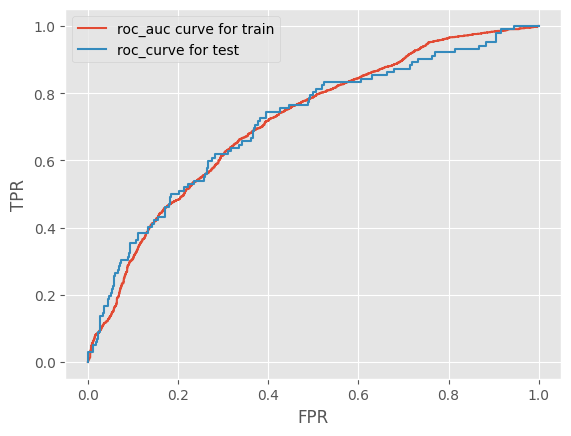

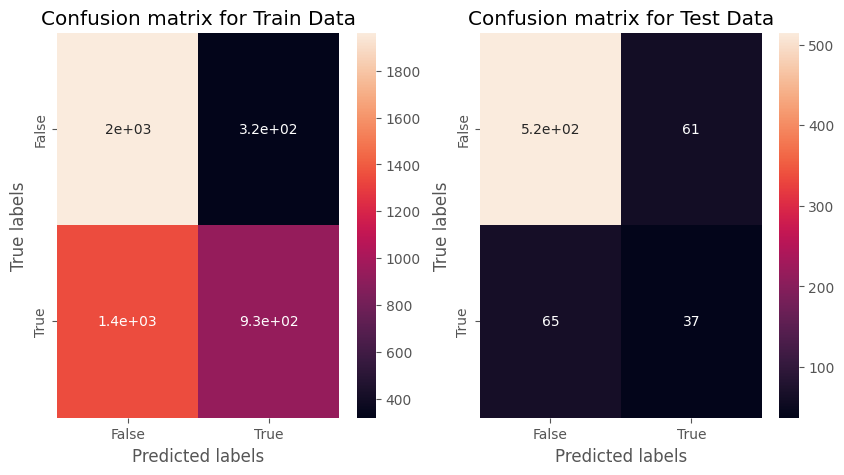



The classification report for train data is:

               precision    recall  f1-score      support
0              0.592034  0.859772  0.701215  2282.000000
1              0.744000  0.407537  0.526614  2282.000000
accuracy       0.633655  0.633655  0.633655     0.633655
macro avg      0.668017  0.633655  0.613914  4564.000000
weighted avg   0.668017  0.633655  0.613914  4564.000000


The classification report for test data is:

               precision    recall  f1-score     support
0              0.887931  0.894097  0.891003  576.000000
1              0.377551  0.362745  0.370000  102.000000
accuracy       0.814159  0.814159  0.814159    0.814159
macro avg      0.632741  0.628421  0.630502  678.000000
weighted avg   0.811148  0.814159  0.812622  678.000000


In [177]:
# Visualizing evaluation Metric Score chart
nb_model=model_scores(nb,X_res_tr,X_test,y_res_tr,y_test)

In [178]:
model_df['Naive Bayes']=nb_model

In [179]:
model_df

,Logistic Regression,Logistic Regression tuned,KNearestNeighbors,KNearestNeighbors_tuned,Naive Bayes
precision_train,0.663684,0.663904,0.895212,1.000000,0.668017
precision_test,0.613584,0.613584,0.548898,0.568142,0.632741
recall_train,0.663672,0.663891,0.870727,1.000000,0.633655
recall_test,0.697049,0.697049,0.584252,0.628830,0.628421
roc_auc_train,0.731952,0.731960,0.987001,1.000000,0.713643
roc_auc_test,0.722818,0.722903,0.608949,0.636021,0.711533
accuracy_train,0.663672,0.663891,0.870727,1.000000,0.633655
accuracy_test,0.718289,0.718289,0.663717,0.629794,0.814159
f1_train,0.663666,0.663885,0.868694,1.000000,0.613914
f1_test,0.615143,0.615143,0.537683,0.540411,0.630502


#### 2. Cross- Validation & Hyperparameter Tuning

In [180]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
nb=GaussianNB()
nb_grid=GridSearchCV(nb,param_grid={},cv=skf,scoring='recall')

# Fit the Algorithm
nb_grid.fit(X_res_tr,y_res_tr)
nb_optimal=nb_grid.best_estimator_
# Fit the Algorithm

# Predict on the model

 ROc-AUC score for train data is 0.7136434704861658
 ROC-AUC score for test data is 0.7115332244008716


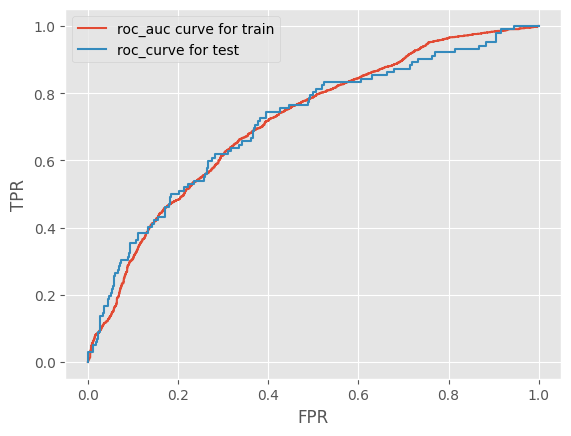

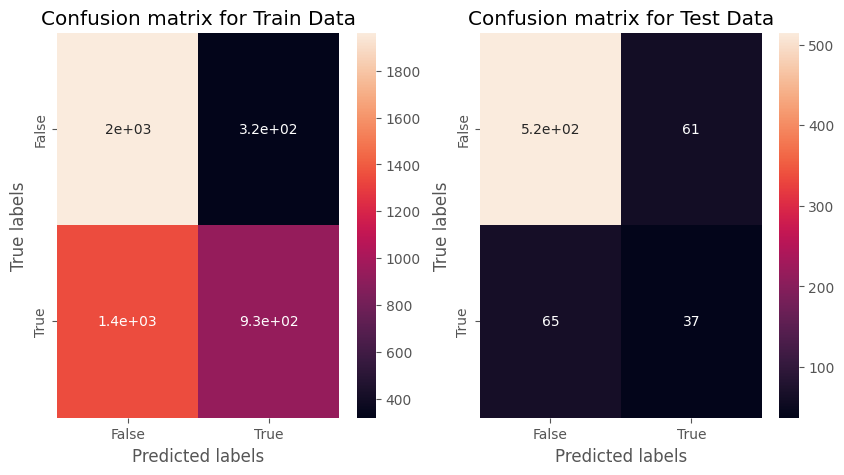



The classification report for train data is:

               precision    recall  f1-score      support
0              0.592034  0.859772  0.701215  2282.000000
1              0.744000  0.407537  0.526614  2282.000000
accuracy       0.633655  0.633655  0.633655     0.633655
macro avg      0.668017  0.633655  0.613914  4564.000000
weighted avg   0.668017  0.633655  0.613914  4564.000000


The classification report for test data is:

               precision    recall  f1-score     support
0              0.887931  0.894097  0.891003  576.000000
1              0.377551  0.362745  0.370000  102.000000
accuracy       0.814159  0.814159  0.814159    0.814159
macro avg      0.632741  0.628421  0.630502  678.000000
weighted avg   0.811148  0.814159  0.812622  678.000000


In [181]:
nb_model_cross_validated=model_scores(nb_optimal,X_res_tr,X_test,y_res_tr,y_test)

In [182]:
model_df['Naive Bayes CV']=nb_model_cross_validated

In [183]:
model_df

,Logistic Regression,Logistic Regression tuned,KNearestNeighbors,KNearestNeighbors_tuned,Naive Bayes,Naive Bayes CV
precision_train,0.663684,0.663904,0.895212,1.000000,0.668017,0.668017
precision_test,0.613584,0.613584,0.548898,0.568142,0.632741,0.632741
recall_train,0.663672,0.663891,0.870727,1.000000,0.633655,0.633655
recall_test,0.697049,0.697049,0.584252,0.628830,0.628421,0.628421
roc_auc_train,0.731952,0.731960,0.987001,1.000000,0.713643,0.713643
roc_auc_test,0.722818,0.722903,0.608949,0.636021,0.711533,0.711533
accuracy_train,0.663672,0.663891,0.870727,1.000000,0.633655,0.633655
accuracy_test,0.718289,0.718289,0.663717,0.629794,0.814159,0.814159
f1_train,0.663666,0.663885,0.868694,1.000000,0.613914,0.613914
f1_test,0.615143,0.615143,0.537683,0.540411,0.630502,0.630502


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### Decision Tree

In [184]:
# ML Model - 3 Implementation
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()


 ROc-AUC score for train data is 1.0
 ROC-AUC score for test data is 0.5397263071895424


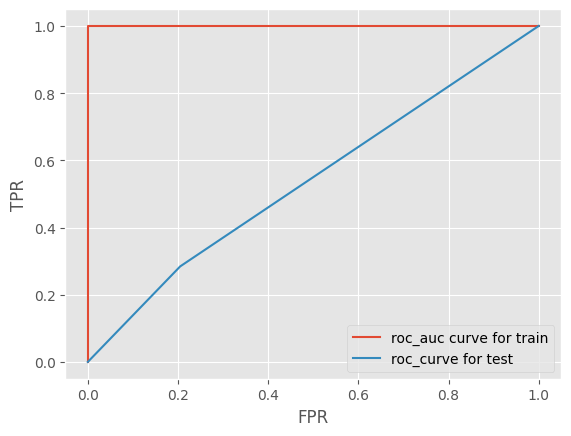

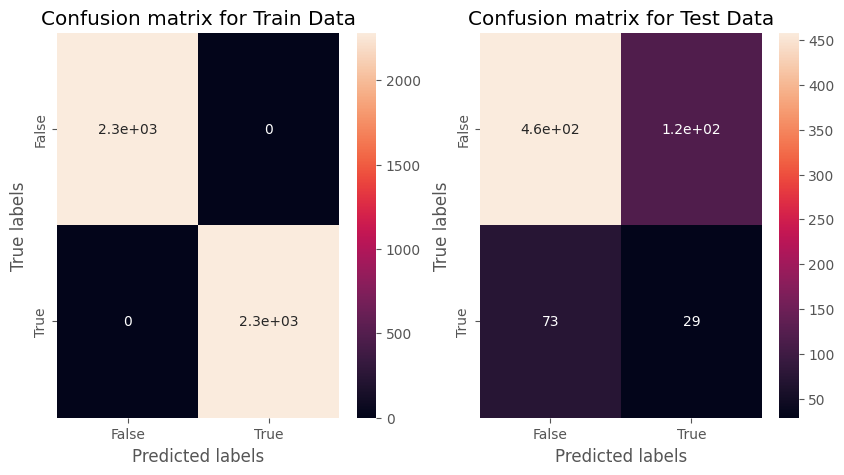



The classification report for train data is:

               precision  recall  f1-score  support
0                   1.0     1.0       1.0   2282.0
1                   1.0     1.0       1.0   2282.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   4564.0
weighted avg        1.0     1.0       1.0   4564.0


The classification report for test data is:

               precision    recall  f1-score     support
0              0.862524  0.795139  0.827462  576.000000
1              0.197279  0.284314  0.232932  102.000000
accuracy       0.718289  0.718289  0.718289    0.718289
macro avg      0.529901  0.539726  0.530197  678.000000
weighted avg   0.762442  0.718289  0.738019  678.000000


In [185]:
dt_model=model_scores(dt,X_res_tr,X_test,y_res_tr,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [186]:
model_df['Decision Tree']=dt_model

In [187]:
model_df

,Logistic Regression,Logistic Regression tuned,KNearestNeighbors,KNearestNeighbors_tuned,Naive Bayes,Naive Bayes CV,Decision Tree
precision_train,0.663684,0.663904,0.895212,1.000000,0.668017,0.668017,1.000000
precision_test,0.613584,0.613584,0.548898,0.568142,0.632741,0.632741,0.529901
recall_train,0.663672,0.663891,0.870727,1.000000,0.633655,0.633655,1.000000
recall_test,0.697049,0.697049,0.584252,0.628830,0.628421,0.628421,0.539726
roc_auc_train,0.731952,0.731960,0.987001,1.000000,0.713643,0.713643,1.000000
roc_auc_test,0.722818,0.722903,0.608949,0.636021,0.711533,0.711533,0.539726
accuracy_train,0.663672,0.663891,0.870727,1.000000,0.633655,0.633655,1.000000
accuracy_test,0.718289,0.718289,0.663717,0.629794,0.814159,0.814159,0.718289
f1_train,0.663666,0.663885,0.868694,1.000000,0.613914,0.613914,1.000000
f1_test,0.615143,0.615143,0.537683,0.540411,0.630502,0.630502,0.530197


Looking at the model 's performance model seems to have been overfitted, need to do cross validation and hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [197]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'max_depth' : [5,6,7,8,9,10],
        'min_samples_split' : [2,3,4,5,6,7,8,9,10],
        'min_samples_leaf' : np.arange(10,20)}
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
dt=DecisionTreeClassifier()

dt_grid=GridSearchCV(dt,param_grid=param_grid,cv=skf,scoring='recall')

# Fit the Algorithm
dt_grid.fit(X_res_tr,y_res_tr)
dt_optimal=dt_grid.best_estimator_
# Fit the Algorithm

# Predict on the model


In [198]:
dt_grid.best_params_

{'max_depth': 6, 'min_samples_leaf': 13, 'min_samples_split': 3}

 ROc-AUC score for train data is 0.8365031058906306
 ROC-AUC score for test data is 0.6186172385620914


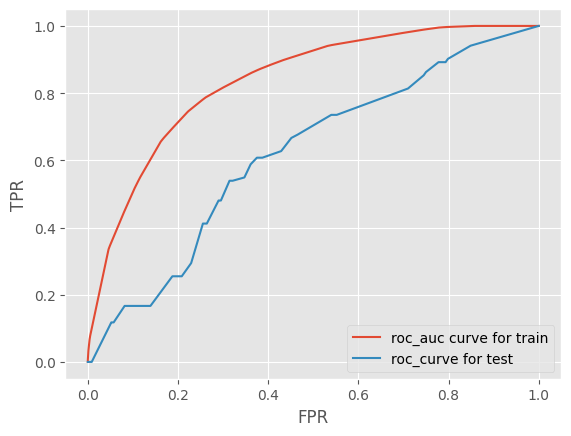

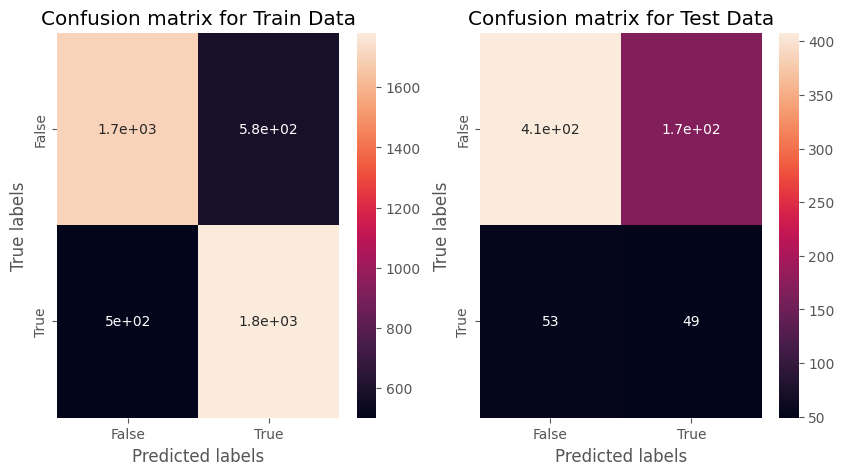



The classification report for train data is:

               precision    recall  f1-score      support
0              0.772727  0.744961  0.758590  2282.000000
1              0.753807  0.780894  0.767111  2282.000000
accuracy       0.762927  0.762927  0.762927     0.762927
macro avg      0.763267  0.762927  0.762851  4564.000000
weighted avg   0.763267  0.762927  0.762851  4564.000000


The classification report for test data is:

               precision    recall  f1-score     support
0              0.885033  0.708333  0.786885  576.000000
1              0.225806  0.480392  0.307210  102.000000
accuracy       0.674041  0.674041  0.674041    0.674041
macro avg      0.555419  0.594363  0.547048  678.000000
weighted avg   0.785857  0.674041  0.714722  678.000000


In [199]:
dt_model_cross_validated=model_scores(dt_optimal,X_res_tr,X_test,y_res_tr,y_test)

In [200]:
model_df['Decision Trees tuned']=dt_model_cross_validated

In [201]:
model_df

,Logistic Regression,Logistic Regression tuned,KNearestNeighbors,KNearestNeighbors_tuned,Naive Bayes,Naive Bayes CV,Decision Tree,Decision Trees tuned
precision_train,0.663684,0.663904,0.895212,1.000000,0.668017,0.668017,1.000000,0.763267
precision_test,0.613584,0.613584,0.548898,0.568142,0.632741,0.632741,0.529901,0.555419
recall_train,0.663672,0.663891,0.870727,1.000000,0.633655,0.633655,1.000000,0.762927
recall_test,0.697049,0.697049,0.584252,0.628830,0.628421,0.628421,0.539726,0.594363
roc_auc_train,0.731952,0.731960,0.987001,1.000000,0.713643,0.713643,1.000000,0.836503
roc_auc_test,0.722818,0.722903,0.608949,0.636021,0.711533,0.711533,0.539726,0.618617
accuracy_train,0.663672,0.663891,0.870727,1.000000,0.633655,0.633655,1.000000,0.762927
accuracy_test,0.718289,0.718289,0.663717,0.629794,0.814159,0.814159,0.718289,0.674041
f1_train,0.663666,0.663885,0.868694,1.000000,0.613914,0.613914,1.000000,0.762851
f1_test,0.615143,0.615143,0.537683,0.540411,0.630502,0.630502,0.530197,0.547048


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [189]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [190]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***